In [276]:
import numpy as np, matplotlib.pyplot as plt
import os
from scipy import interpolate
from astropy.convolution import convolve_fft, Gaussian1DKernel
from glob import glob

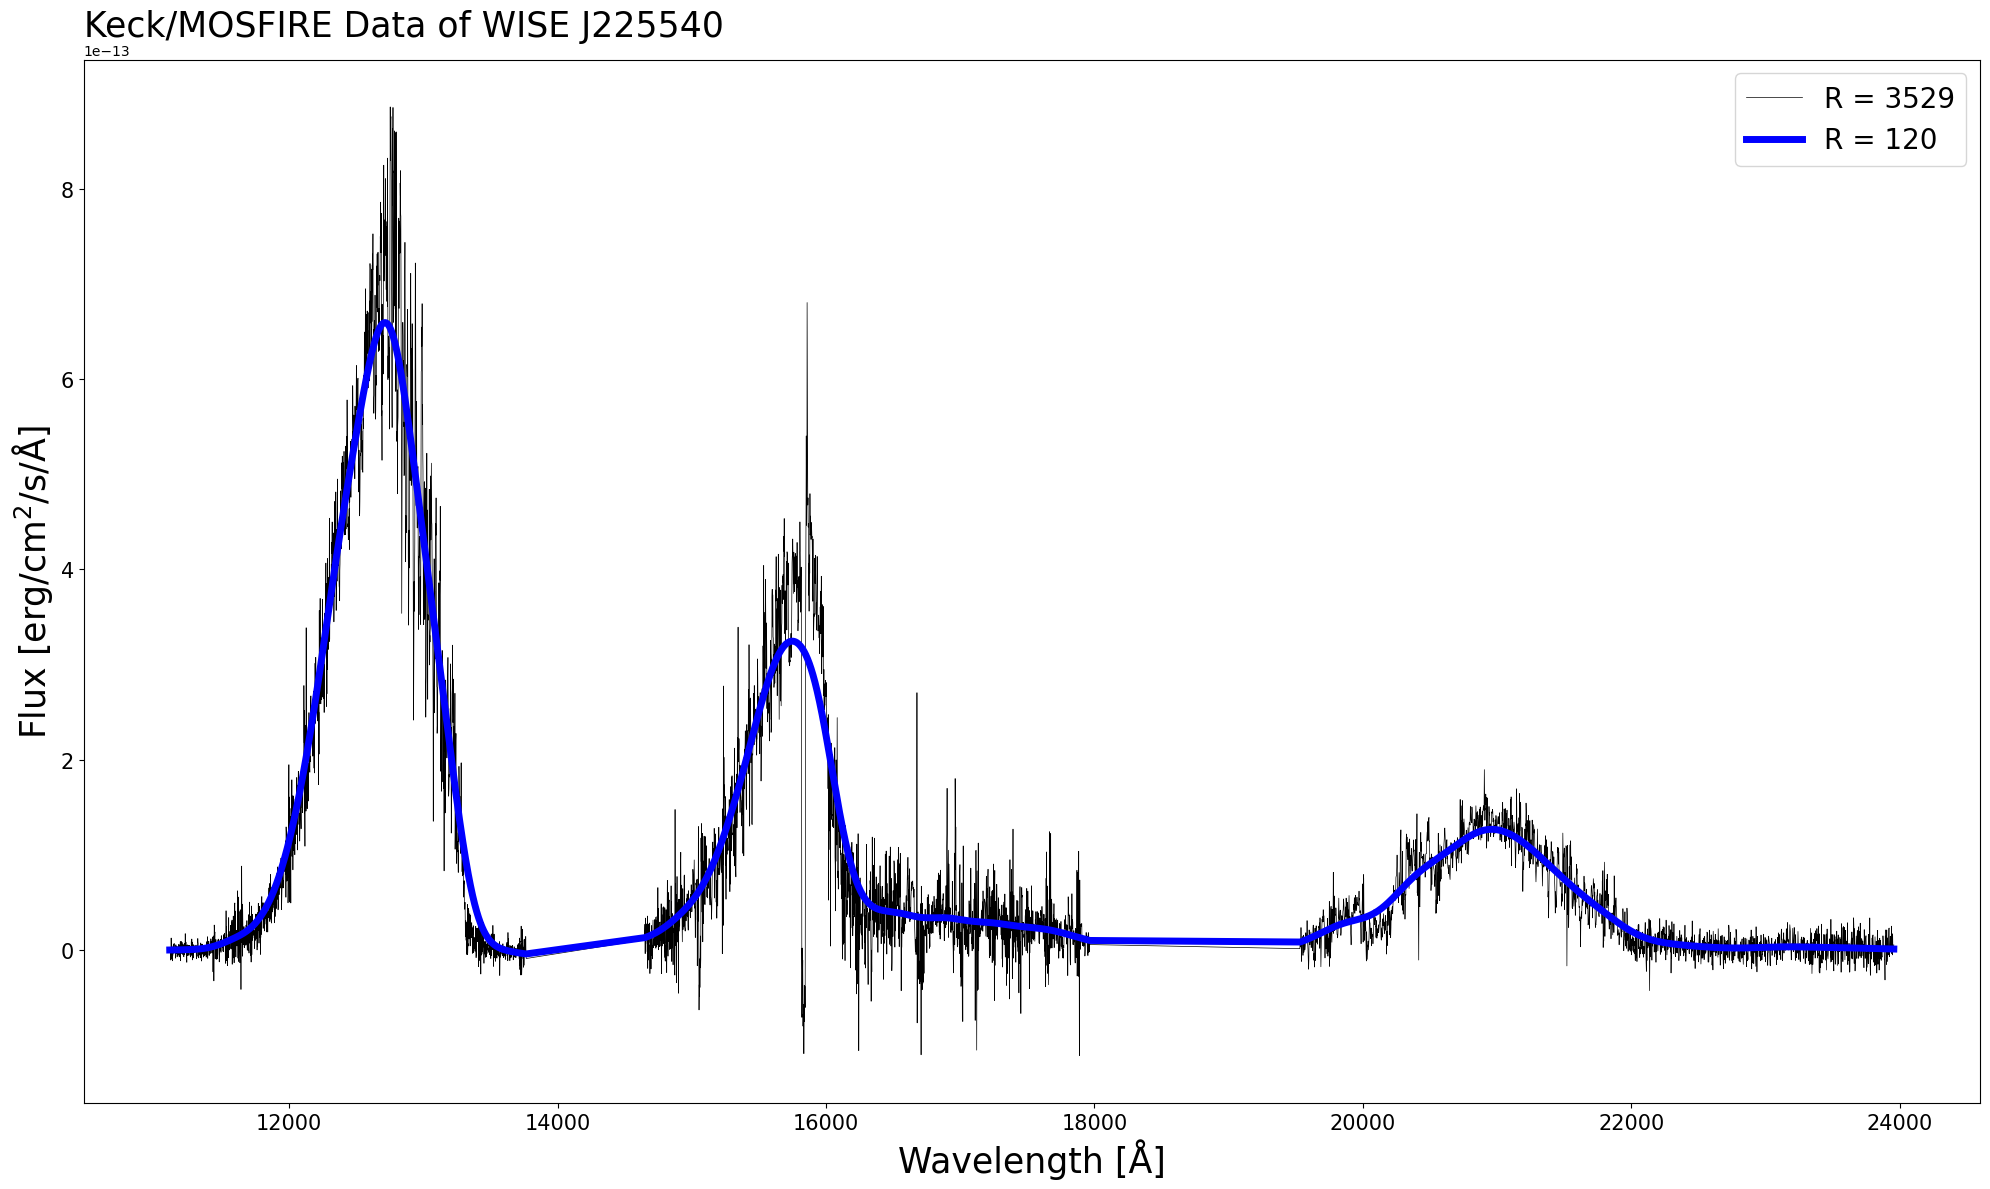

In [290]:
######################################
## Read in and define the Keck data ##
######################################

msfire = np.loadtxt('Flux_cal_JHK_2M2255-3118.txt')
wave = msfire[:, 0] # wavelength in Å
wave_um = msfire[:, 0] * 1e-4 # wavelength in µm
flux = msfire[:, 1] # erg/cm^2/s/Å
unc = msfire[:, 2] # erg/cm^2/s/Å

msfire_smooth = np.loadtxt('/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118_spex_res_species_units.txt')
w_smooth = msfire_smooth[0, :] # wavelength in Å
w_um_smooth = msfire_smooth[0, :] * 1e-4 # wavelength in µm
f_smooth = msfire_smooth[1, :] * 1e11 # SpeX resolution/Species units to erg/cm^2/s/Å
u_smooth = msfire_smooth[2, :] * 1e11 # SpeX resolution/Species units to erg/cm^2/s/Å

w_min = wave_smooth[0]
w_max = wave_smooth[-1]

plt.figure(figsize = (20, 12))
plt.plot(wave_um * 1e4, flux, color = 'black', linewidth = 0.5, label = 'R = 3529')
plt.plot(w_smooth * 1e4, f_smooth, color = 'blue', linewidth = 5, label = 'R = 120')
plt.title('Keck/MOSFIRE Data of WISE J225540', loc = 'left', fontsize = 25)
plt.xlabel('Wavelength [Å]', fontsize = 25)
plt.ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
plt.legend(loc = 'upper right', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
#plt.savefig('Basic MOSFIRE Flux Data')

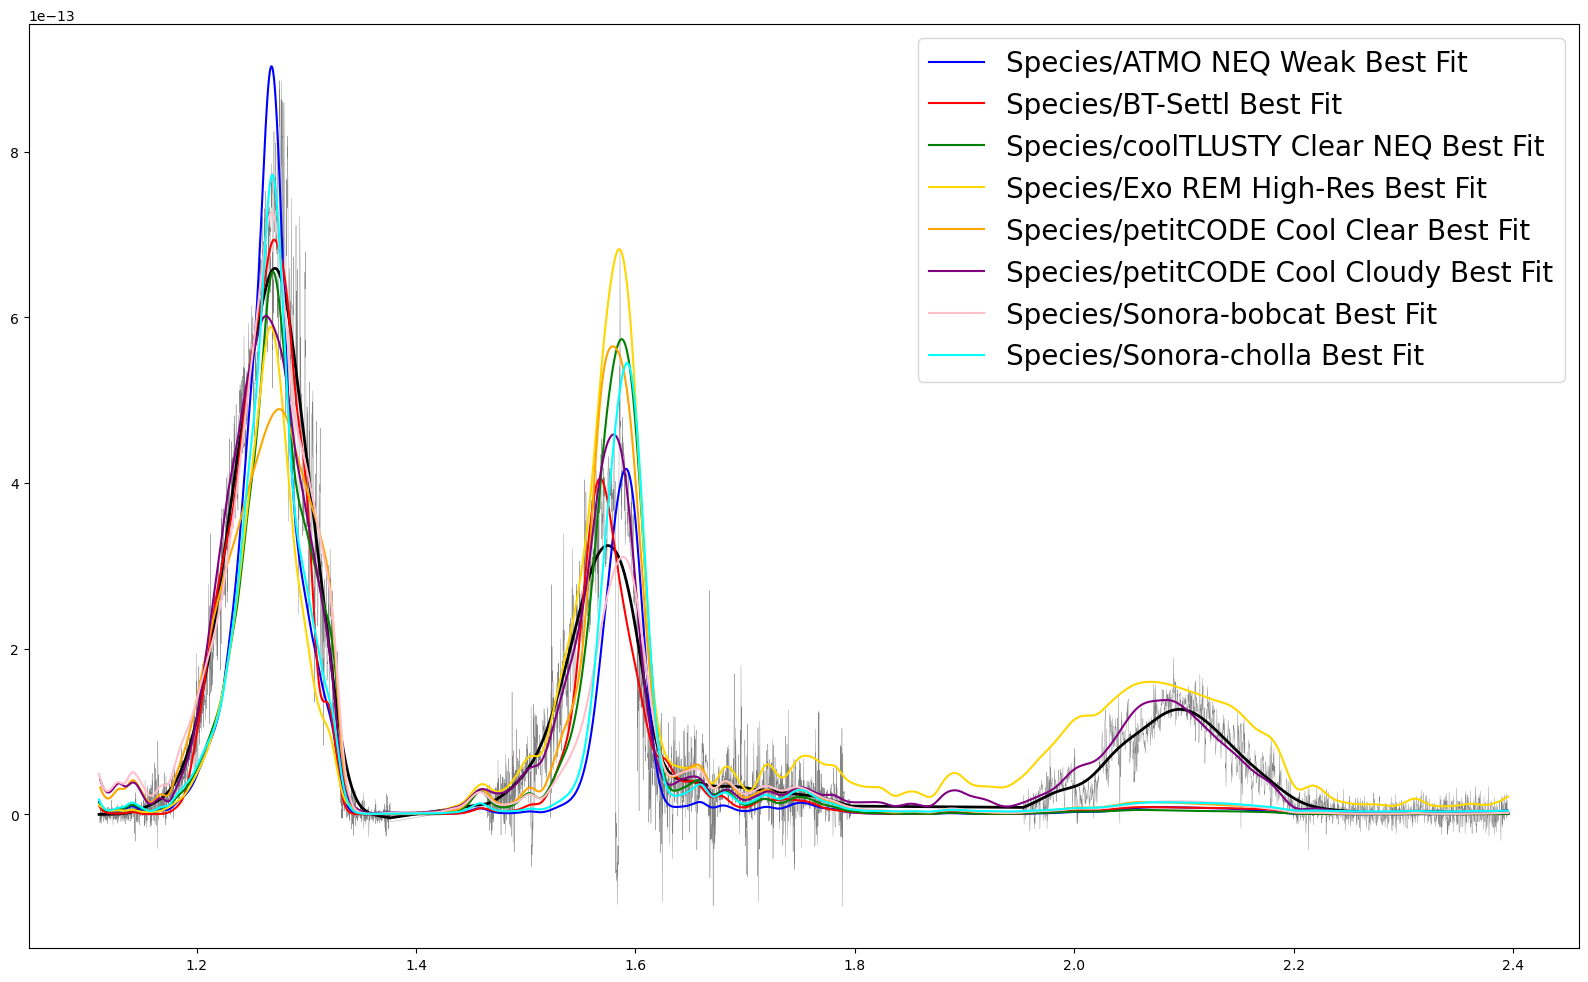

In [312]:
#######################################
## Read in and define all file paths ##
#######################################

target = 'WISE J225540.75-311842.0'
target_short = 'WISE J225540'

kunits_filename = '/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118.txt'
sunits_filename = '/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118_spex_res_species_units.txt'

bt_path = '/Users/bseamons/Documents/Research/models_1717611630/bt-settl_models/'
bt_models = glob(os.path.join(bt_path, '*.7.dat.txt'))

atmo_path_norm = '/Users/bseamons/Documents/Research/atmo_models/grid_p0'
atmo_models_norm = glob(os.path.join(atmo_path_norm, '*.dat'))

atmo_path_noPH3 = '/Users/bseamons/Documents/Research/atmo_models/no_PH3/'
atmo_models_noPH3 = glob(os.path.join(atmo_path_noPH3, '*.dat'))

atmo_path_noPH3_500600 = '/Users/bseamons/Documents/Research/atmo_models/no_PH3_500-600/'
atmo_models_noPH3_500600 = glob(os.path.join(atmo_path_noPH3_500600, '*.dat'))

spex_path = '/Users/bseamons/Documents/Research/SpeX_archived_spectra/'
spex_models = glob(os.path.join(spex_path, '*.txt'))

spex_path_T75 = '/Users/bseamons/Documents/Research/SpeX_archived_spectra/Grouped/T7.5/'
spex_T75 = glob(os.path.join(spex_path_T75, '*.txt'))

HD3651b_path = '/Users/bseamons/Documents/Research/SpeX_archived_spectra/Grouped/T7.5/'
HD3651b = glob(os.path.join(HD3651b_path, '*.txt'))

ross = np.loadtxt('Ross458C_IRTF_SpeX_noheaders.csv', delimiter = ',')
ross_wave = ross[:, 0]
ross_flux = ross[:, 1]
ross_unc = ross[:, 2]

spec_atmoNWsmooth = np.loadtxt('species_bestfit_atmo-neq-weak_spexres.txt')
atmoNWsmooth_w = spec_atmoNWsmooth[:, 0]
atmoNWsmooth_f = spec_atmoNWsmooth[:, 1] * 1e11
atmoNWsmooth_mask = (atmoNWsmooth_w >= w_min) & (atmoNWsmooth_w <= w_max)
atmoNWsmooth_wave = atmoNWsmooth_w[atmoNWsmooth_mask]
atmoNWsmooth_flux = atmoNWsmooth_f[atmoNWsmooth_mask]

spec_btsmooth = np.loadtxt('species_bestfit_bt-settl_spexres_model.txt')
btsmooth_w = spec_btsmooth[:, 0]
btsmooth_f = spec_btsmooth[:, 1] * 1e11
btsmooth_mask = (btsmooth_w >= w_min) & (btsmooth_w <= w_max)
btsmooth_wave = btsmooth_w[btsmooth_mask]
btsmooth_flux = btsmooth_f[btsmooth_mask]

spec_coolTLUSTY = np.loadtxt('species_bestfit_lacy2023-clear-neq_spexres_model.txt')
coolTLUSTY_w = spec_coolTLUSTY[:, 0]
coolTLUSTY_f = spec_coolTLUSTY[:, 1] * 1e11
coolTLUSTY_mask = (coolTLUSTY_w >= w_min) & (coolTLUSTY_w <= w_max)
coolTLUSTY_wave = coolTLUSTY_w[coolTLUSTY_mask]
coolTLUSTY_flux = coolTLUSTY_f[coolTLUSTY_mask]

spec_exoremhighres = np.loadtxt('species_bestfit_exo-rem-highres_spexres_model.txt')
exoremhighres_w = spec_exoremhighres[:, 0]
exoremhighres_f = spec_exoremhighres[:, 1] * 1e11
exoremhighres_mask = (exoremhighres_w >= w_min) & (exoremhighres_w <= w_max)
exoremhighres_wave = exoremhighres_w[exoremhighres_mask]
exoremhighres_flux = exoremhighres_f[exoremhighres_mask]

spec_petitcoolclear = np.loadtxt('species_bestfit_petitcode-cool-clear_spexres_model.txt')
petitcoolclear_w = spec_petitcoolclear[:, 0]
petitcoolclear_f = spec_petitcoolclear[:, 1] * 1e11
petitcoolclear_mask = (petitcoolclear_w >= w_min) & (petitcoolclear_w <= w_max)
petitcoolclear_wave = petitcoolclear_w[petitcoolclear_mask]
petitcoolclear_flux = petitcoolclear_f[petitcoolclear_mask]

spec_petitcoolcloudy = np.loadtxt('species_bestfit_petitcode-cool-cloudy_spexres_model.txt')
petitcoolcloudy_w = spec_petitcoolcloudy[:, 0]
petitcoolcloudy_f = spec_petitcoolcloudy[:, 1] * 1e11
petitcoolcloudy_mask = (petitcoolcloudy_w >= w_min) & (petitcoolcloudy_w <= w_max)
petitcoolcloudy_wave = petitcoolcloudy_w[petitcoolcloudy_mask]
petitcoolcloudy_flux = petitcoolcloudy_f[petitcoolcloudy_mask]

spec_bobcatsmooth = np.loadtxt('species_bestfit_sonora-bobcat_spexres.txt')
bobcatsmooth_w = spec_bobcatsmooth[:, 0]
bobcatsmooth_f = spec_bobcatsmooth[:, 1] * 1e11
bobcatsmooth_mask = (bobcatsmooth_w >= w_min) & (bobcatsmooth_w <= w_max)
bobcatsmooth_wave = bobcatsmooth_w[bobcatsmooth_mask]
bobcatsmooth_flux = bobcatsmooth_f[bobcatsmooth_mask]

spec_chollasmooth = np.loadtxt('species_bestfit_sonora-cholla_spexres.txt')
chollasmooth_w = spec_chollasmooth[:, 0]
chollasmooth_f = spec_chollasmooth[:, 1] * 1e11
chollasmooth_mask = (chollasmooth_w >= w_min) & (chollasmooth_w <= w_max)
chollasmooth_wave = chollasmooth_w[chollasmooth_mask]
chollasmooth_flux = chollasmooth_f[chollasmooth_mask]

plt.figure(figsize = (20, 12))
plt.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
plt.plot(w_smooth, f_smooth, color = 'black', linewidth = 2)
plt.plot(atmoNWsmooth_wave, atmoNWsmooth_flux, color = 'blue', label = 'Species/ATMO NEQ Weak Best Fit')
plt.plot(btsmooth_wave, btsmooth_flux, color = 'red', label = 'Species/BT-Settl Best Fit')
plt.plot(coolTLUSTY_wave, coolTLUSTY_flux, color = 'green', label = 'Species/coolTLUSTY Clear NEQ Best Fit')
plt.plot(exoremhighres_wave, exoremhighres_flux, color = 'gold', label = 'Species/Exo REM High-Res Best Fit')
plt.plot(petitcoolclear_wave, petitcoolclear_flux, color = 'orange', label = 'Species/petitCODE Cool Clear Best Fit')
plt.plot(petitcoolcloudy_wave, petitcoolcloudy_flux, color = 'purple', label = 'Species/petitCODE Cool Cloudy Best Fit')
plt.plot(bobcatsmooth_wave, bobcatsmooth_flux, color = 'pink', label = 'Species/Sonora-bobcat Best Fit')
plt.plot(chollasmooth_wave, chollasmooth_flux, color = 'aqua', label = 'Species/Sonora-cholla Best Fit')
plt.legend(loc = 'upper right', fontsize = 20)

In [51]:
#####################################################
## Define the necessary constants and calculations ##
#####################################################

parallax = 0.0704 # arcseconds
r_jup_km = 69911 # km
r_jup_A = r_jup_km * 1e13 # Å
d_ly = 1 / parallax # distance to target, LY
d_km = d_ly * 9.461e12 # distance to target, km
d_A = d_km * 1e13 # distance to target, Å
scale_km = (r_jup_km ** 2) / (d_km ** 2) # scale factor (r ** 2 / d ** 2), km
scale_A = (r_jup_A ** 2) / (d_A ** 2) # scale factor, Å

RJ = 3318
RH = 3660
RK = 3610
R_array = np.array([RJ, RH, RK])
R = np.average(R_array)

print(f'* Target distance in light-years: {d_ly} ly\n* Target distance in kilometers:  {d_km} km\n* Target distance in angstroms:   {d_A} Å\n')
print(f'* Scaling constant (km):          {scale_km}\n* Scaling constant (Å):           {scale_A}\n')
print(f'* Average resolution:             {R}')

* Target distance in light-years: 14.204545454545453 ly
* Target distance in kilometers:  134389204545454.53 km
* Target distance in angstroms:   1.3438920454545454e+27 Å

* Scaling constant (km):          2.7062147816281133e-19
* Scaling constant (Å):           2.7062147816281133e-19

* Average resolution:             3529.3333333333335


In [52]:
def convolve_v2(spec, R, sample):
    '''
    This will convolve a model spectrum with a gaussian kernel to the given resolution of the observations [R].
    * Parameters:
        * spec: source spectrum (the object that will be convolved)
        * R: int (the resolution (dL/L) to convolve to)
        * sample: int (oversampling factor for smoothing)
    * Returns:
        * smooth_spec: the convolved spectrum (and possibly the original grid)
    * Notes:
        * Built to work in tandem with bestfit_[model]()
        * Needs numpy as np and convolve_fft, Gaussian1DKernel from astropy.convolution
    '''
    ## Define the model wavelength and flux grids
    w_grid = spec[0, :]
    f_grid = spec[1, :]

    ## Define a logarithmic wavelength grid
    w_logmin = np.log10(np.nanmin(w_grid))
    w_logmax = np.log10(np.nanmax(w_grid))
    N = np.size(w_grid) * sample
    w_loggrid = np.logspace(w_logmin, w_logmax, num = N)

    ## Calculate the standard deviation of the Gaussian kernel
    R_grid = (w_loggrid[1:-1] + w_loggrid[0:-2]) / (w_loggrid[1:-1] - w_loggrid[0:-2]) / 2
    sigma = np.median(R_grid) / R
    if sigma < 1:
        sigma = 1

    ## Interpolate the models onto the log grid, convolve them, and interpolate the results onto the original grid
    f_log = np.interp(w_loggrid, w_grid, f_grid)
    gauss = Gaussian1DKernel(stddev = sigma)
    f_conv = convolve_fft(f_log, gauss)
    f_smooth = np.interp(w_grid, w_loggrid, f_conv)
    smooth_spec = np.vstack([w_grid, f_smooth])

    return smooth_spec

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/1358231042.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_atmoNWmin = np.where(G_atmoNW == G_atmoNWmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/1358231042.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_atmoNW = int(where_G_atmoNWmin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/1358231042.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing

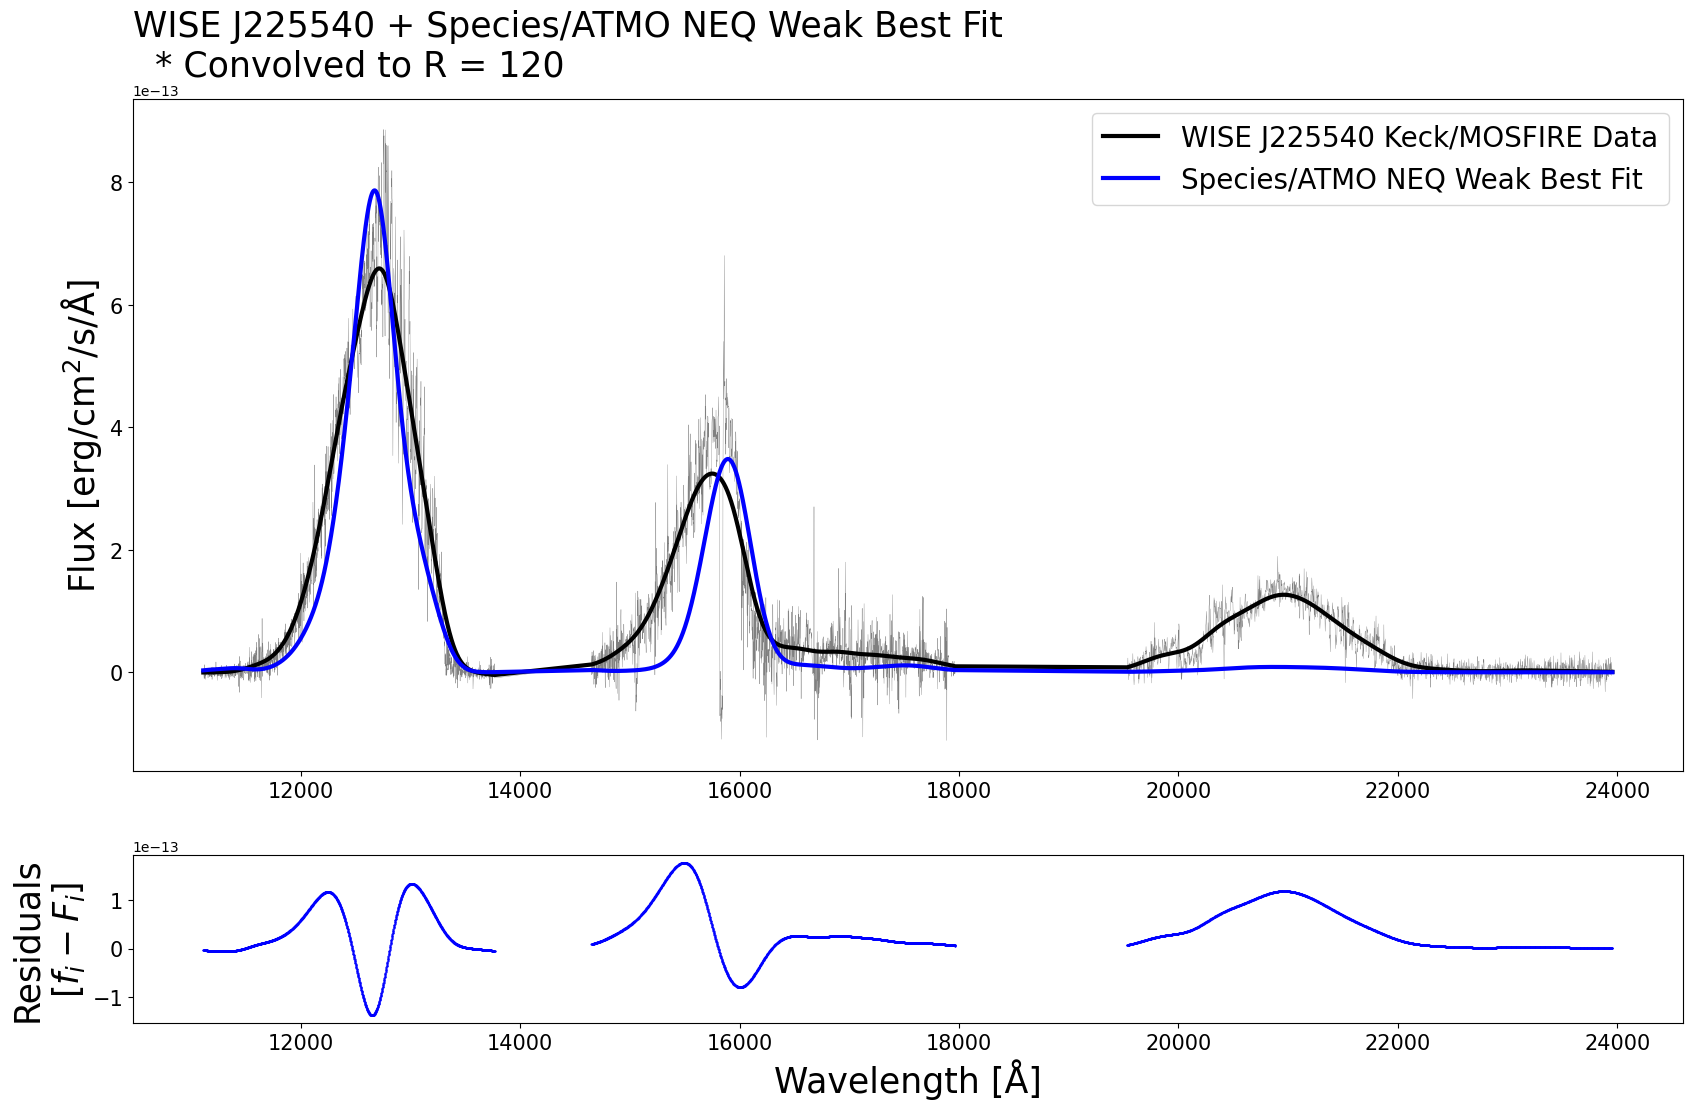

In [280]:
####################################
## Species/ATMO NEQ Weak Fitting ##
####################################

C_atmoNW = np.zeros(len(atmoNWsmooth_wave))
G_atmoNW = np.zeros(len(atmoNWsmooth_wave))
low_mod_atmoNW = np.zeros((len(atmoNWsmooth_wave), 2, (len(wave_um))))
for i in range(len(atmoNWsmooth_wave)):
    interp_atmoNW = np.interp(wave_um, atmoNWsmooth_wave, atmoNWsmooth_flux)
    range_atmoNW = np.vstack([wave_um, interp_atmoNW])
    low_mod_atmoNW[i, :, :] = convolve_v2(range_atmoNW, 120, 1)
    C_atmoNW[i] = (np.nansum((low_mod_atmoNW[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_atmoNW[i, 1, :] ** 2 / u_smooth ** 2))
G_atmoNW = np.nansum(((f_smooth - low_mod_atmoNW[i, 1, :] * C_atmoNW[i]) / u_smooth) ** 2)
G_atmoNWmin = np.min(G_atmoNW)
where_G_atmoNWmin = np.where(G_atmoNW == G_atmoNWmin)
C_atmoNWmin = C_atmoNW[where_G_atmoNWmin]
modindex_atmoNW = int(where_G_atmoNWmin[0])
residuals_atmoNW = f_smooth - low_mod_atmoNW[int(where_G_atmoNWmin[0]), 1, :] * C_atmoNWmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_atmoNW[modindex_atmoNW, 0, :] * 1e4, low_mod_atmoNW[modindex_atmoNW, 1, :] * C_atmoNWmin, color = 'blue', linewidth = 3, label = 'Species/ATMO NEQ Weak Best Fit')
ax1.set_title(f'{target_short} + Species/ATMO NEQ Weak Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_atmoNWmin}\n  * Minimum G value: {G_atmoNWmin}\n  * T$_e$$_f$$_f$: 400 K\n  * logg: 5.2\n', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_atmoNW, color = 'blue', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies ATMO NEQ Weak Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/2743631921.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_btmin = np.where(G_bt == G_btmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/2743631921.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_bt = int(where_G_btmin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/2743631921.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (De

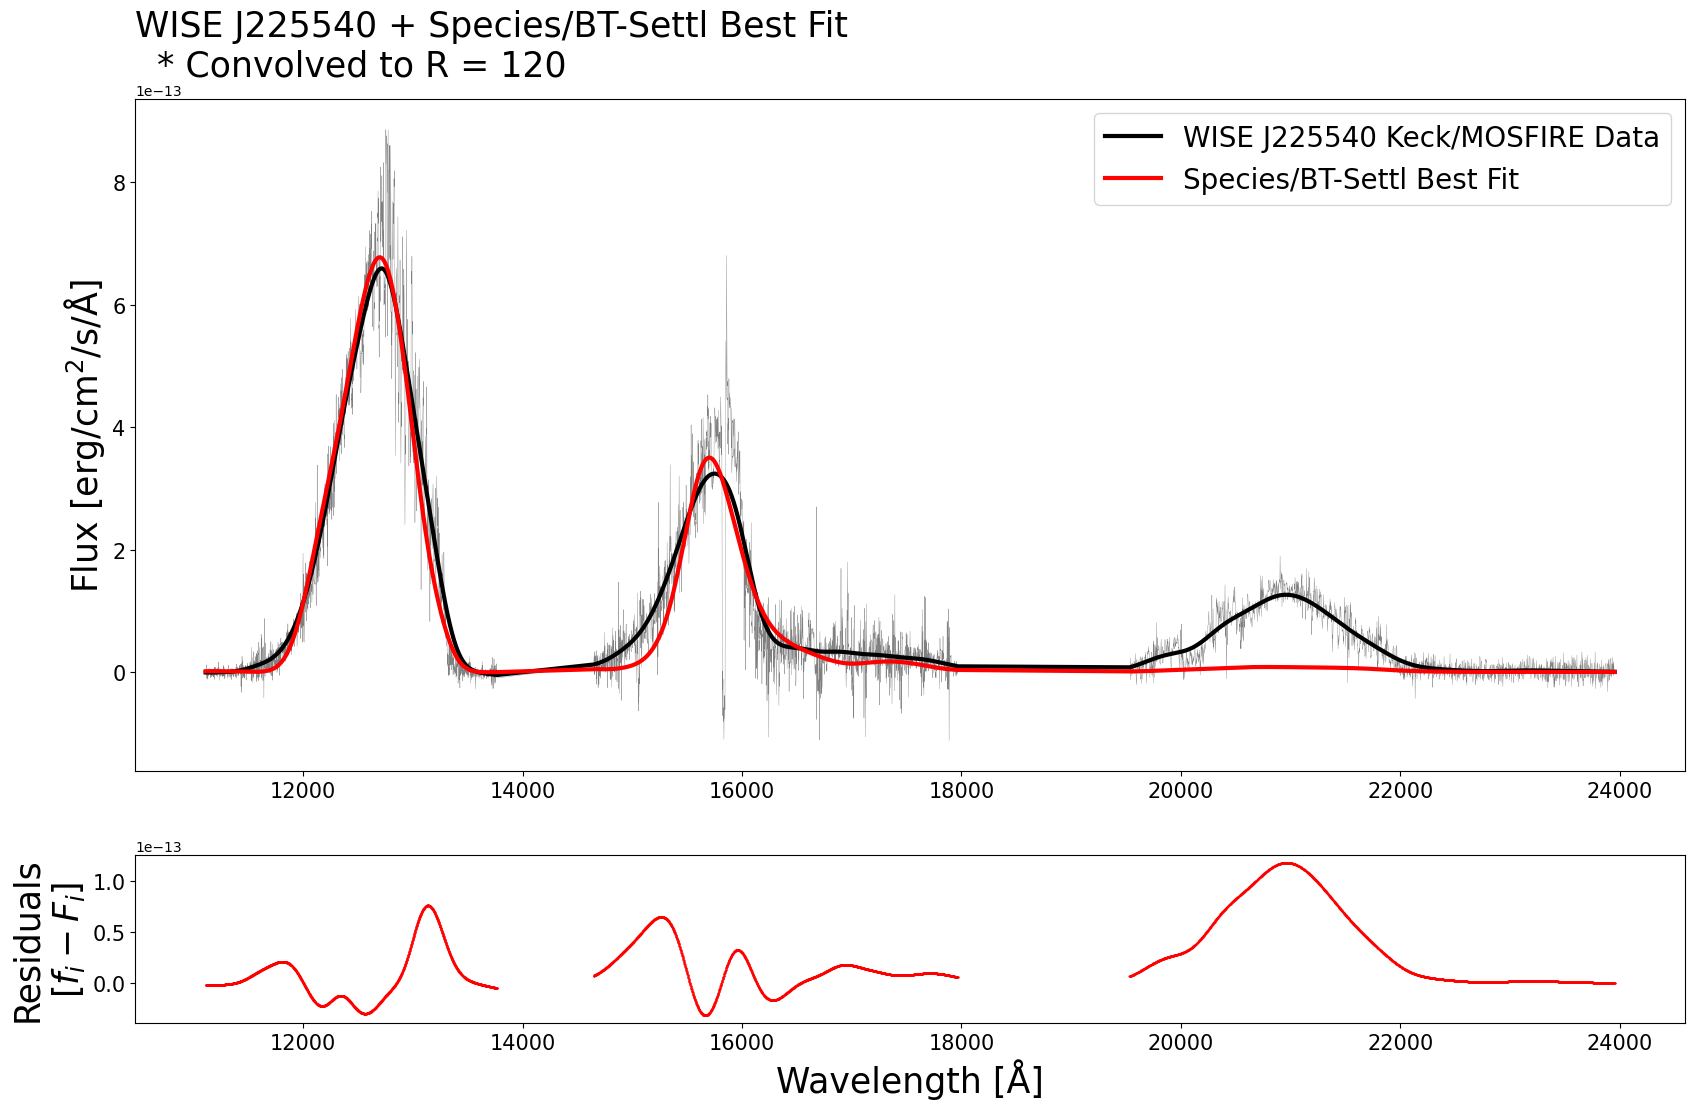

In [282]:
##############################
## Species/BT-Settl Fitting ##
##############################

C_bt = np.zeros(len(btsmooth_wave))
G_bt = np.zeros(len(btsmooth_wave))
low_mod_bt = np.zeros((len(btsmooth_wave), 2, (len(wave_um))))
for i in range(len(btsmooth_wave)):
    interp_bt = np.interp(wave_um, btsmooth_wave, btsmooth_flux)
    range_bt = np.vstack([wave_um, interp_bt])
    low_mod_bt[i, :, :] = convolve_v2(range_bt, 120, 1)
    C_bt[i] = (np.nansum((low_mod_bt[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_bt[i, 1, :] ** 2 / u_smooth ** 2))
G_bt = np.nansum(((f_smooth - low_mod_bt[i, 1, :] * C_bt[i]) / u_smooth) ** 2)
G_btmin = np.min(G_bt)
where_G_btmin = np.where(G_bt == G_btmin)
C_btmin = C_bt[where_G_btmin]
modindex_bt = int(where_G_btmin[0])
residuals_bt = f_smooth - low_mod_bt[int(where_G_btmin[0]), 1, :] * C_btmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_bt[modindex_bt, 0, :] * 1e4, low_mod_bt[modindex_bt, 1, :] * C_btmin, color = 'red', linewidth = 3, label = 'Species/BT-Settl Best Fit')
ax1.set_title(f'{target_short} + Species/BT-Settl Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_btmin}\n  * Minimum G value: {G_btmin}\n  * T$_e$$_f$$_f$: 500 K\n  * logg: 5.5\n', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_bt, color = 'red', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies BT-Settl Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/3828149041.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_btsettl = int(where_G_btsettlmin[0])


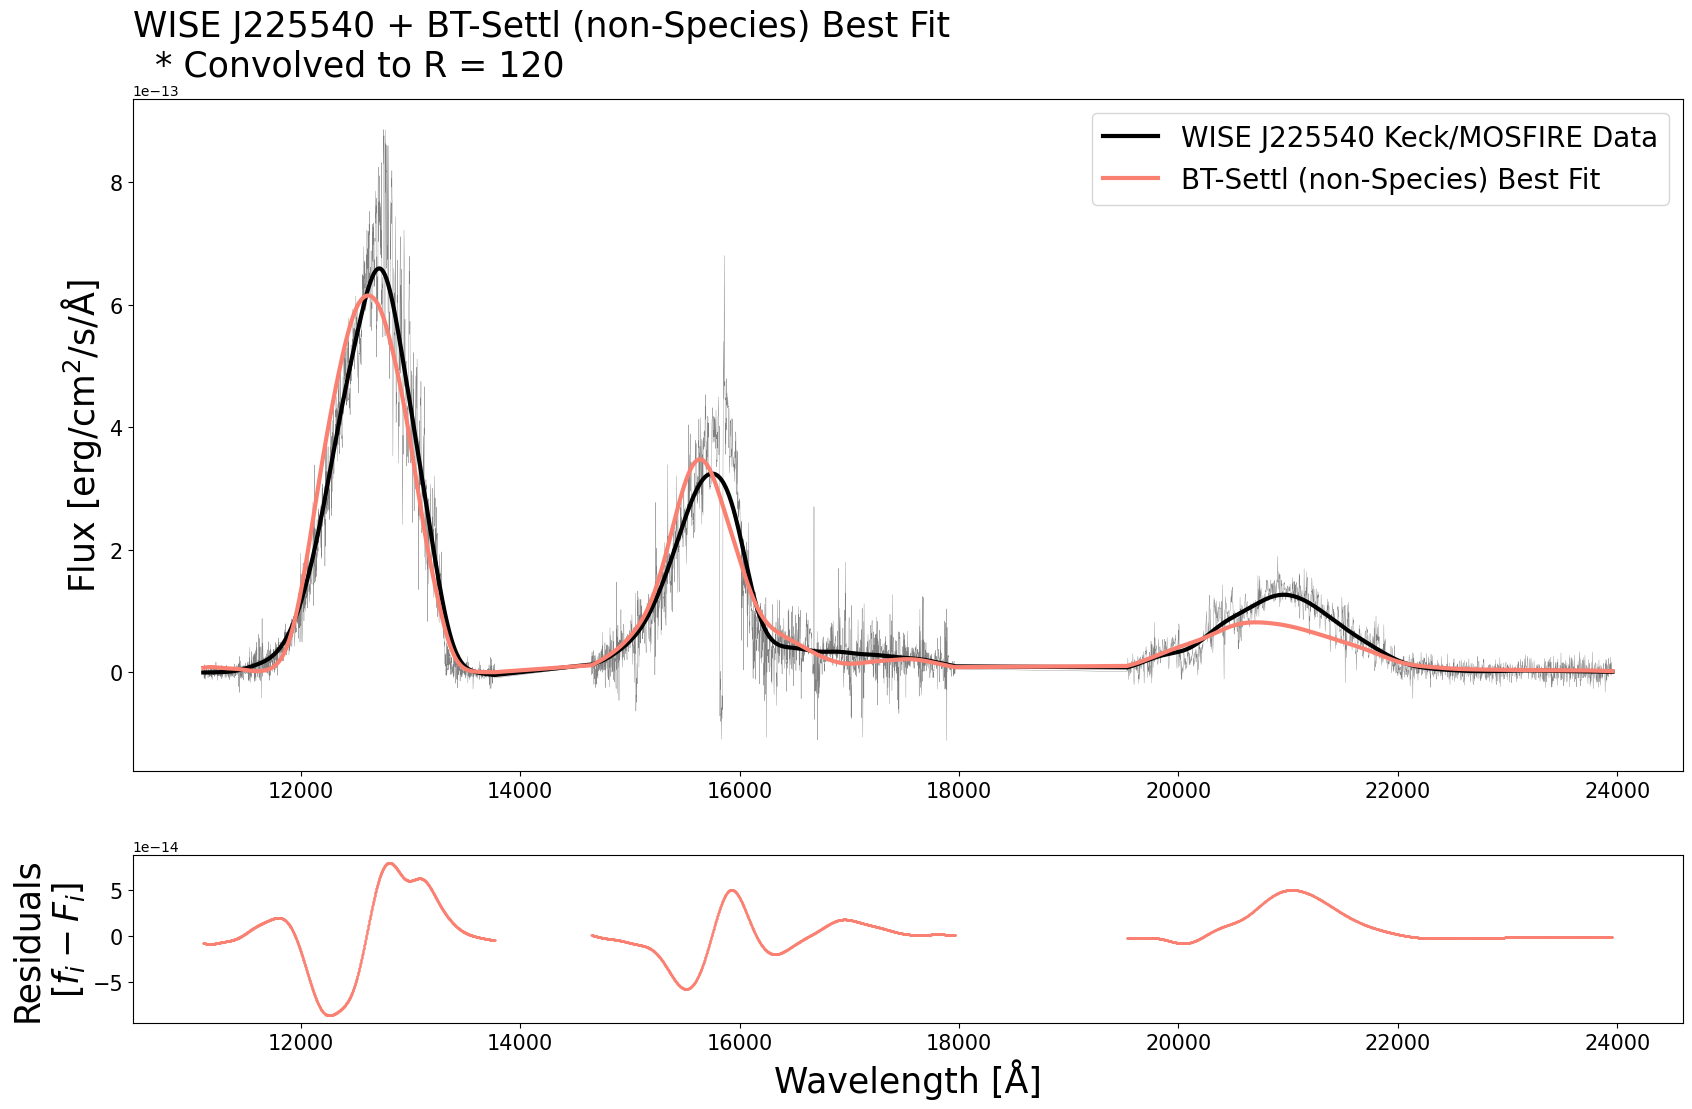

In [293]:
####################################
## BT-Settl (non-Species) Fitting ##
####################################

C_btsettl = np.zeros(len(bt_models))
G_btsettl = np.zeros(len(bt_models))
low_mod_btsettl = np.zeros((len(bt_models), 2, (len(wave_um))))
for i in range(len(bt_models)):
    mod = np.loadtxt(bt_models[i])
    w = mod[:, 0]
    f = mod[:, 1]
    interp_btsettl = np.interp(wave, w, f)
    range_btsettl = np.vstack([wave, interp_btsettl])
    low_mod_btsettl[i, :, :] = convolve_v2(range_btsettl, 120, 1)
    C_btsettl[i] = (np.nansum((low_mod_btsettl[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_btsettl[i, 1, :] ** 2 / u_smooth ** 2))
    G_btsettl[i] = np.nansum(((f_smooth - low_mod_btsettl[i, 1, :] * C_btsettl[i]) / u_smooth) ** 2)
G_btsettlmin = np.min(G_btsettl)
where_G_btsettlmin = np.where(G_btsettl == G_btsettlmin)
C_btsettlmin = C_btsettl[where_G_btsettlmin]
modindex_btsettl = int(where_G_btsettlmin[0])
bestfit_btsettl = np.loadtxt(bt_models[modindex_btsettl])
bestmodel_btsettl = bt_models[modindex_btsettl]
residuals_btsettl = f_smooth - low_mod_btsettl[modindex_btsettl, 1, :] * C_btsettlmin

fig, (ax1, ax2), = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_btsettl[modindex_btsettl, 0, :], low_mod_btsettl[modindex_btsettl, 1, :] * C_btsettlmin, color = 'salmon', linewidth = 3, label = 'BT-Settl (non-Species) Best Fit')
ax1.set_title(f'{target_short} + BT-Settl (non-Species) Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_btsettlmin}\n  * Minimum G value: {G_btsettlmin}\n  * T$_e$$_f$$_f$: 600 K\n  * logg = 3.5', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_btsettl, color = 'salmon', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSBT-Settl (non-Species) Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/1385837687.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_coolTLUSTYmin = np.where(G_coolTLUSTY == G_coolTLUSTYmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/1385837687.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_coolTLUSTY = int(where_G_coolTLUSTYmin[0])


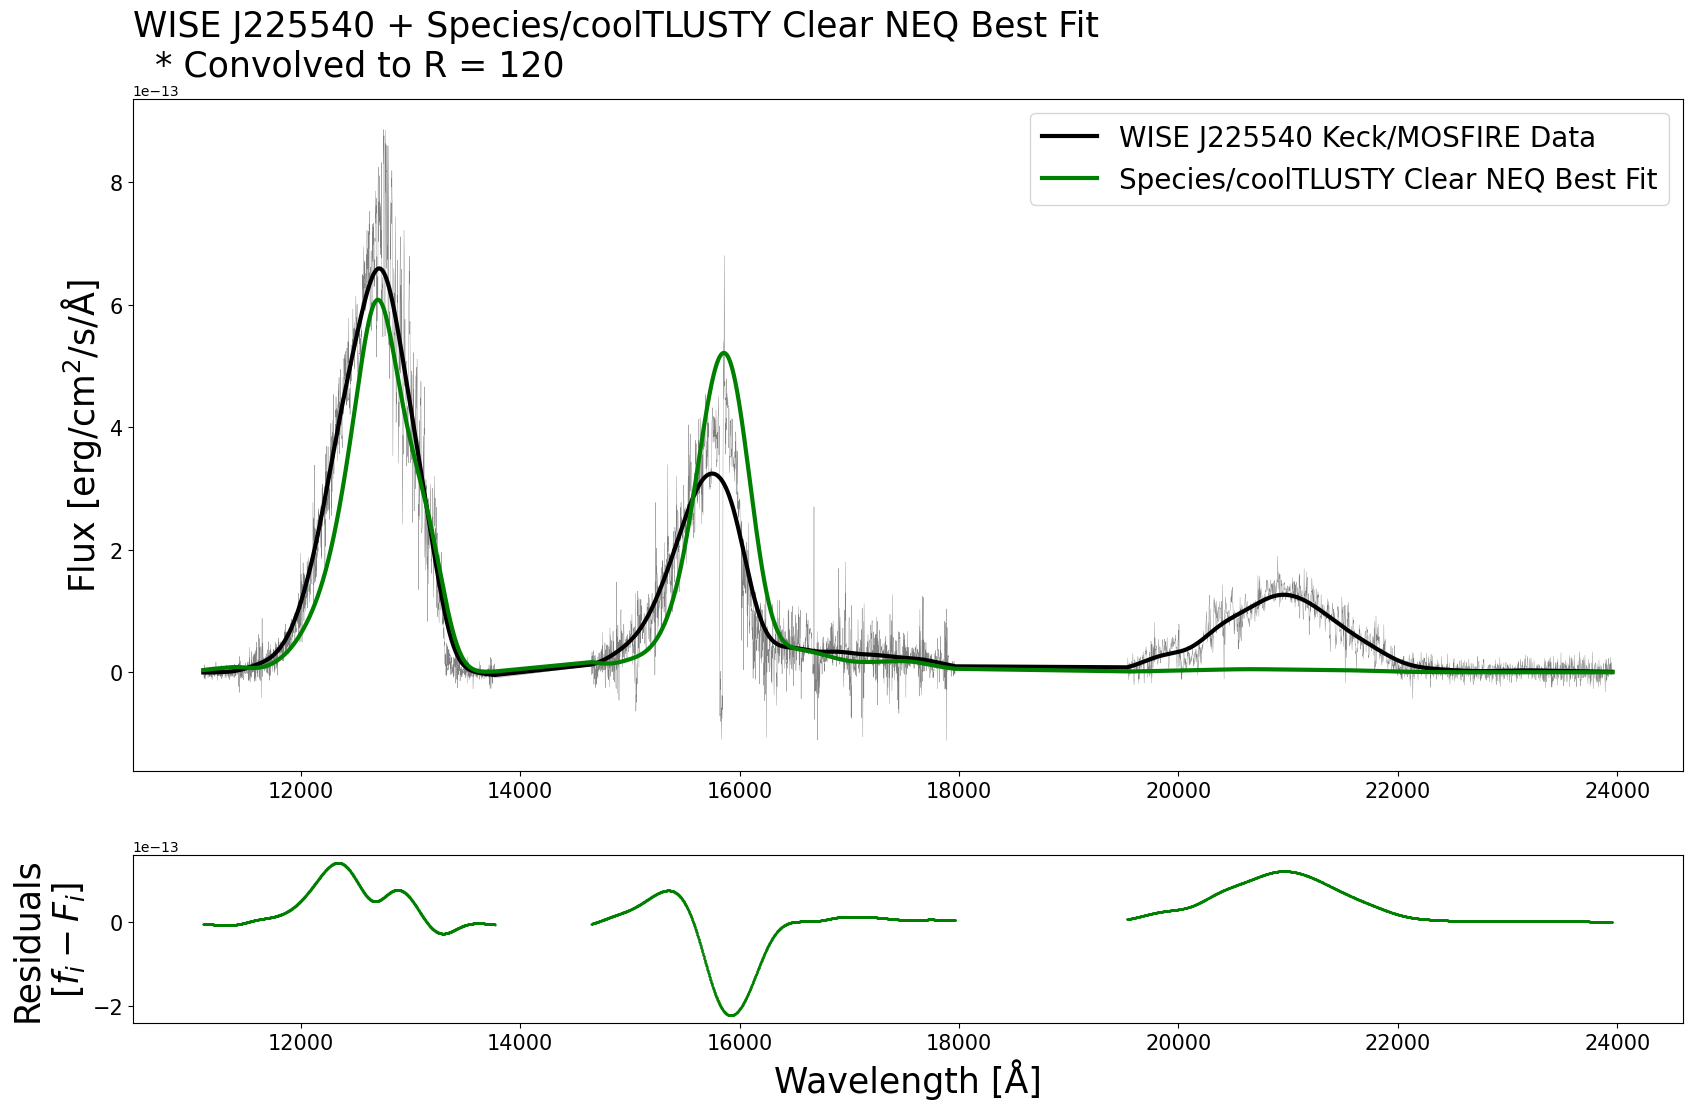

In [295]:
##########################################
## Species/coolTLUSTY Clear NEQ Fitting ##
##########################################

C_coolTLUSTY = np.zeros(len(coolTLUSTY_wave))
G_coolTLUSTY = np.zeros(len(coolTLUSTY_flux))
low_mod_coolTLUSTY = np.zeros((len(coolTLUSTY_wave), 2, (len(wave_um))))
for i in range(len(coolTLUSTY_wave)):
    interp_coolTLUSTY = np.interp(wave_um, coolTLUSTY_wave, coolTLUSTY_flux)
    range_coolTLUSTY = np.vstack([wave_um, interp_coolTLUSTY])
    low_mod_coolTLUSTY[i, :, :] = convolve_v2(range_coolTLUSTY, 120, 1)
    C_coolTLUSTY[i] = (np.nansum((low_mod_coolTLUSTY[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_coolTLUSTY[i, 1, :] ** 2 / u_smooth ** 2))
G_coolTLUSTY = np.nansum(((f_smooth - low_mod_coolTLUSTY[i, 1, :] * C_coolTLUSTY[i]) / u_smooth) ** 2)
G_coolTLUSTYmin = np.min(G_coolTLUSTY)
where_G_coolTLUSTYmin = np.where(G_coolTLUSTY == G_coolTLUSTYmin)
C_coolTLUSTYmin = C_coolTLUSTY[where_G_coolTLUSTYmin]
modindex_coolTLUSTY = int(where_G_coolTLUSTYmin[0])
residuals_coolTLUSTY = f_smooth - low_mod_coolTLUSTY[modindex_coolTLUSTY, 1, :] * C_coolTLUSTYmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4,1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_coolTLUSTY[modindex_coolTLUSTY, 0, :] * 1e4, low_mod_coolTLUSTY[modindex_coolTLUSTY, 1, :] * C_coolTLUSTYmin, color = 'green', linewidth = 3, label = 'Species/coolTLUSTY Clear NEQ Best Fit')
ax1.set_title(f'{target_short} + Species/coolTLUSTY Clear NEQ Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_coolTLUSTYmin}\n  * Minimum G value: {G_coolTLUSTYmin}\n  * T$_e$$_f$$_f$: 400 K\n  * logg: 4.9\n  * Fe/H: -0.3', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_coolTLUSTY, color = 'green', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies coolTLUSTY Clear NEQ Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/583954924.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_exoremhighresmin = np.where(G_exoremhighres == G_exoremhighresmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/583954924.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_exoremhighres = int(where_G_exoremhighresmin[0])


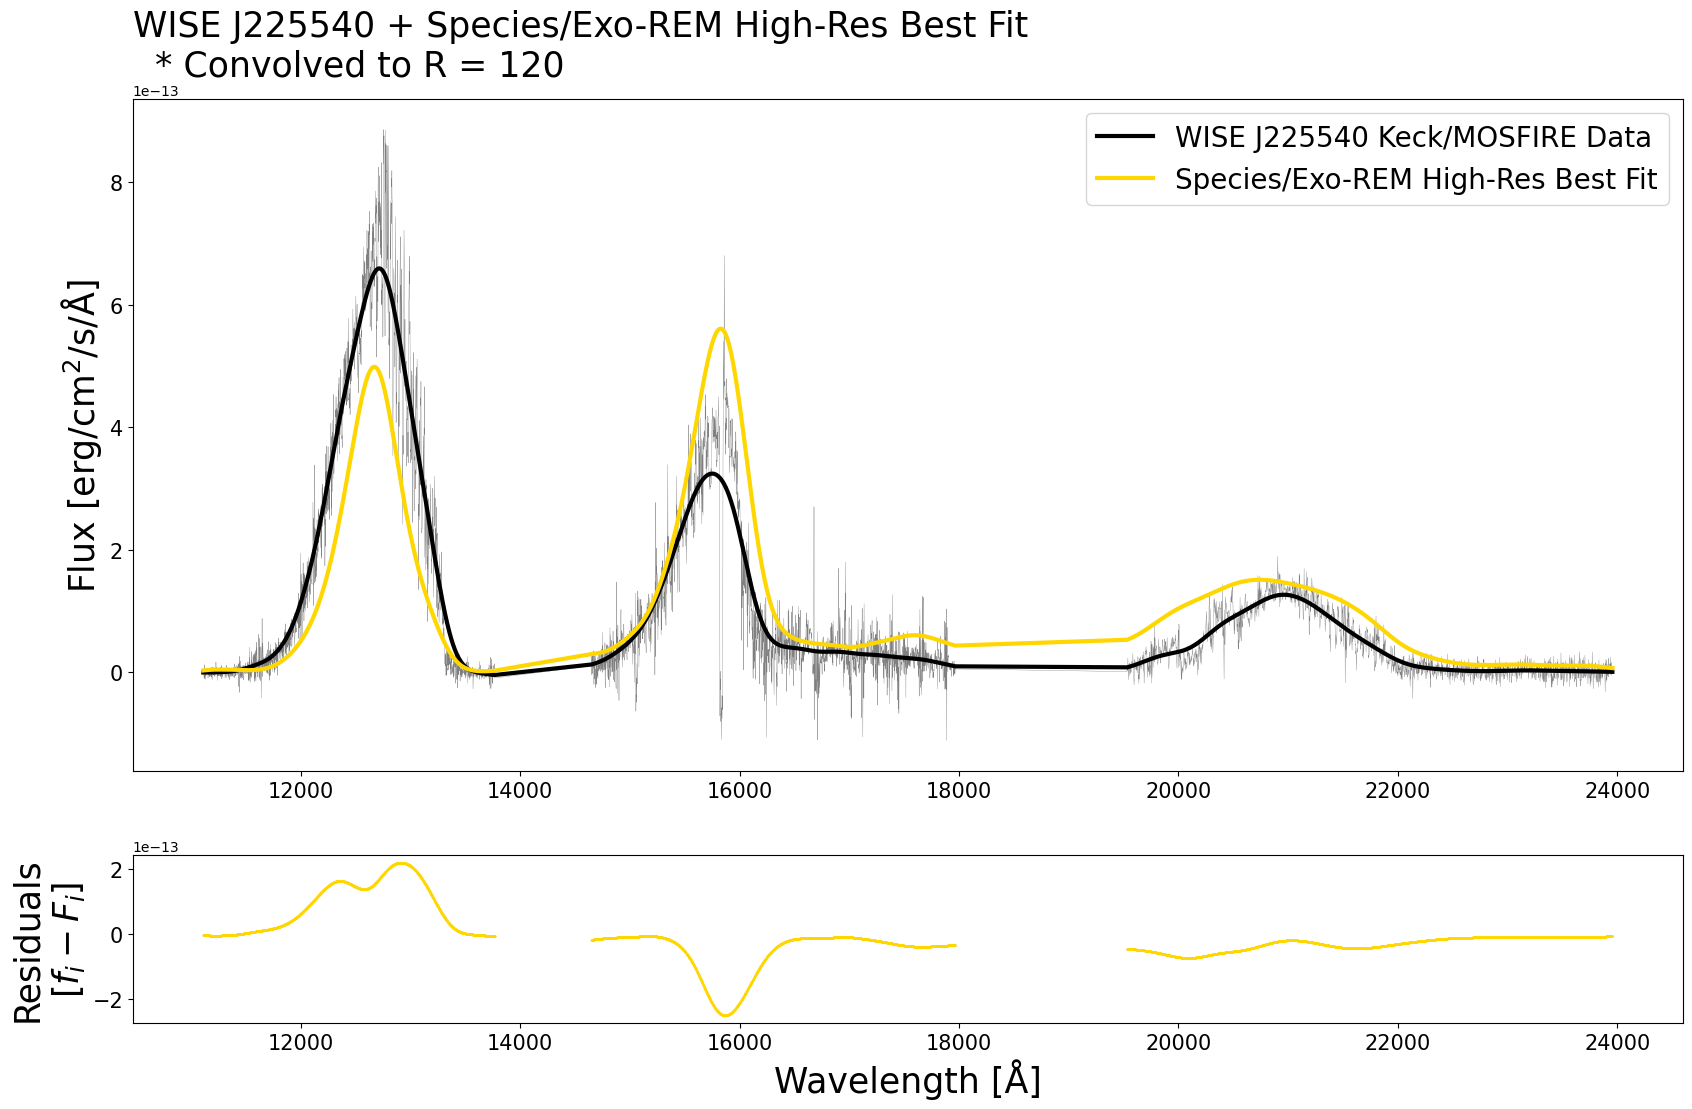

In [297]:
######################################
## Species/Exo-REM High-Res Fitting ##
######################################

C_exoremhighres = np.zeros(len(exoremhighres_wave))
G_exoremhighres = np.zeros(len(exoremhighres_wave))
low_mod_exoremhighres = np.zeros((len(exoremhighres_wave), 2, (len(wave_um))))
for i in range(len(exoremhighres_wave)):
    interp_exoremhighres = np.interp(wave_um, exoremhighres_wave, exoremhighres_flux)
    range_exoremhighres = np.vstack([wave_um, interp_exoremhighres])
    low_mod_exoremhighres[i, :, :] = convolve_v2(range_exoremhighres, 120, 1)
    C_exoremhighres[i] = (np.nansum((low_mod_exoremhighres[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_exoremhighres[i, 1, :] ** 2 / u_smooth ** 2))
G_exoremhighres = np.nansum(((f_smooth - low_mod_exoremhighres[i, 1, :] * C_exoremhighres[i]) / u_smooth) ** 2)
G_exoremhighresmin = np.min(G_exoremhighres)
where_G_exoremhighresmin = np.where(G_exoremhighres == G_exoremhighresmin)
C_exoremhighresmin = C_exoremhighres[where_G_exoremhighresmin]
modindex_exoremhighres = int(where_G_exoremhighresmin[0])
residuals_exoremhighres = f_smooth - low_mod_exoremhighres[modindex_exoremhighres, 1, :] * C_exoremhighresmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_exoremhighres[modindex_exoremhighres, 0, :] * 1e4, low_mod_exoremhighres[modindex_exoremhighres, 1, :] * C_exoremhighresmin, color = 'gold', linewidth = 3, label = 'Species/Exo-REM High-Res Best Fit')
ax1.set_title(f'{target_short} + Species/Exo-REM High-Res Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_exoremhighresmin}\n  * Minimum G value: {G_exoremhighresmin}\n  * T$_e$$_f$$_f$: 404 K\n  * logg = 3.5\n  * Fe/H: -0.5, C/O: 0.41', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_exoremhighres, color = 'gold', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies Exo-REM High-Res Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/1057720534.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_petitcoolclearmin = np.where(G_petitcoolclear == G_petitcoolclearmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/1057720534.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_petitcoolclear = int(where_G_petitcoolclearmin[0])


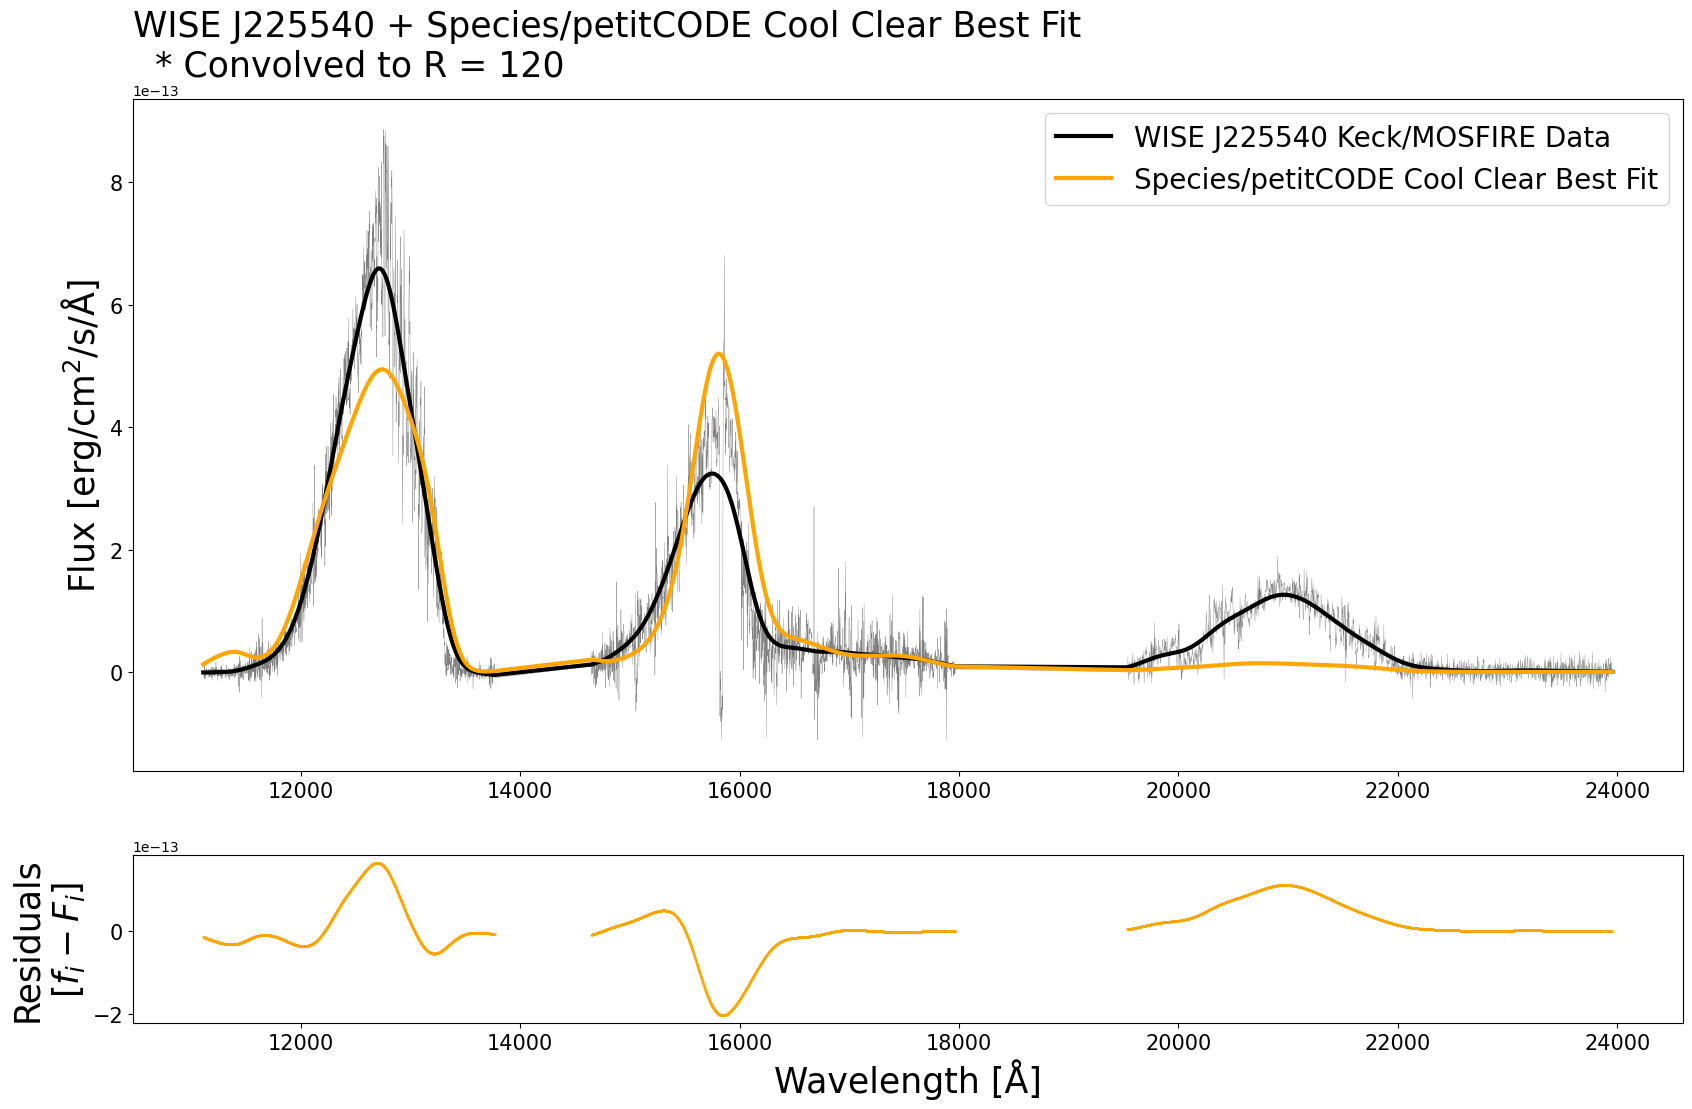

In [299]:
##########################################
## Species/petitCODE Cool Clear Fitting ##
##########################################

C_petitcoolclear = np.zeros(len(petitcoolclear_wave))
G_petitcoolclear = np.zeros(len(petitcoolclear_wave))
low_mod_petitcoolclear = np.zeros((len(petitcoolclear_wave), 2, (len(wave_um))))
for i in range(len(petitcoolclear_wave)):
    interp_petitcoolclear = np.interp(wave_um, petitcoolclear_wave, petitcoolclear_flux)
    range_petitcoolclear = np.vstack([wave_um, interp_petitcoolclear])
    low_mod_petitcoolclear[i, :, :] = convolve_v2(range_petitcoolclear, 120, 1)
    C_petitcoolclear[i] = (np.nansum((low_mod_petitcoolclear[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_petitcoolclear[i, 1, :] ** 2 / u_smooth ** 2))
G_petitcoolclear = np.nansum(((f_smooth - low_mod_petitcoolclear[i, 1, :] * C_petitcoolclear[i]) / u_smooth) ** 2)
G_petitcoolclearmin = np.min(G_petitcoolclear)
where_G_petitcoolclearmin = np.where(G_petitcoolclear == G_petitcoolclearmin)
C_petitcoolclearmin = C_petitcoolclear[where_G_petitcoolclearmin]
modindex_petitcoolclear = int(where_G_petitcoolclearmin[0])
residuals_petitcoolclear = f_smooth - low_mod_petitcoolclear[modindex_petitcoolclear, 1, :] * C_petitcoolclearmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_petitcoolclear[modindex_petitcoolclear, 0, :] * 1e4, low_mod_petitcoolclear[modindex_petitcoolclear, 1, :] * C_petitcoolclearmin, color = 'orange', linewidth = 3, label = 'Species/petitCODE Cool Clear Best Fit')
ax1.set_title(f'{target_short} + Species/petitCODE Cool Clear Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_petitcoolclearmin}\n  * Minimum G value: {G_petitcoolclearmin}\n  * T$_e$$_f$$_f$: 502 K\n  * logg: 4.9\n  * Fe/H: -0.3', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_petitcoolclear, color = 'orange', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies petitCODE Cool Clear Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/3908324763.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_petitcoolcloudymin = np.where(G_petitcoolcloudy == G_petitcoolcloudymin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/3908324763.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_petitcoolcloudy = int(where_G_petitcoolcloudymin[0])


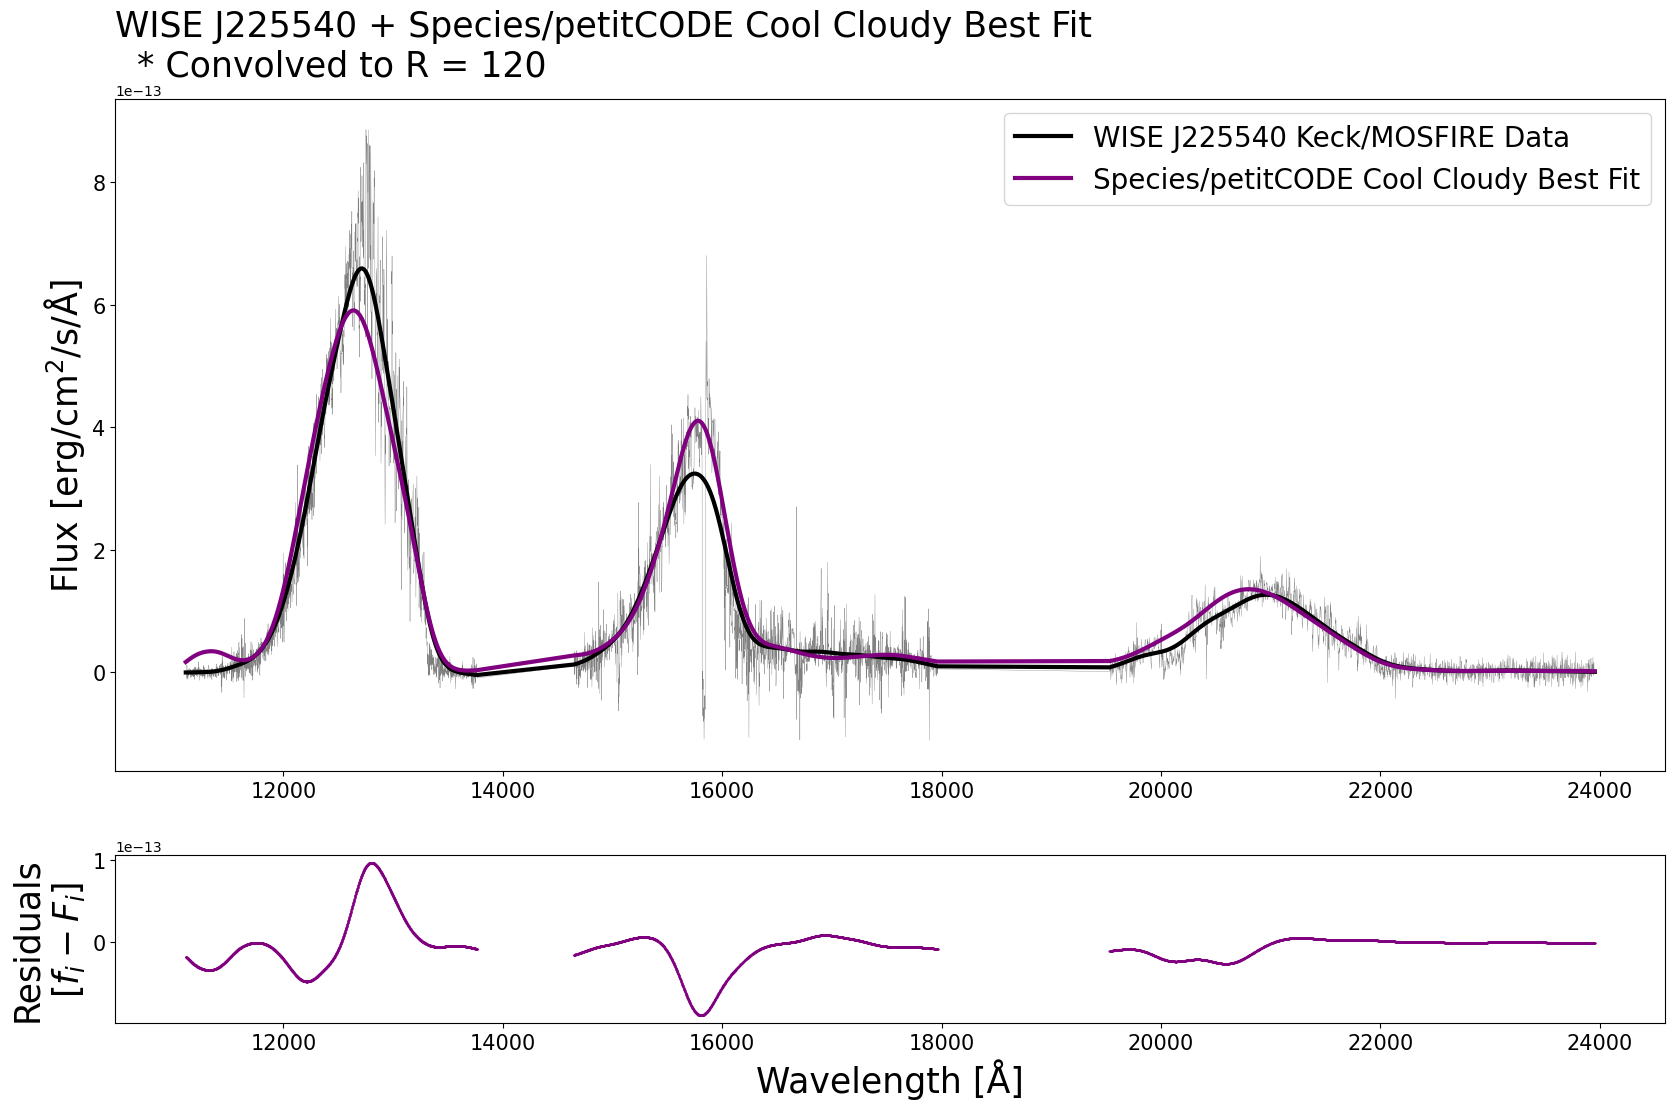

In [301]:
###########################################
## Species/petitCODE Cool Cloudy Fitting ##
###########################################

C_petitcoolcloudy = np.zeros(len(petitcoolcloudy_wave))
G_petitcoolcloudy = np.zeros(len(petitcoolcloudy_wave))
low_mod_petitcoolcloudy = np.zeros((len(petitcoolcloudy_wave), 2, (len(wave_um))))
for i in range(len(petitcoolcloudy_wave)):
    interp_petitcoolcloudy = np.interp(wave_um, petitcoolcloudy_wave, petitcoolcloudy_flux)
    range_petitcoolcloudy = np.vstack([wave_um, interp_petitcoolcloudy])
    low_mod_petitcoolcloudy[i, :, :] = convolve_v2(range_petitcoolcloudy, 120, 1)
    C_petitcoolcloudy[i] = (np.nansum((low_mod_petitcoolcloudy[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_petitcoolcloudy[i, 1, :] ** 2 / u_smooth ** 2))
G_petitcoolcloudy = np.nansum(((f_smooth - low_mod_petitcoolcloudy[i, 1, :] * C_petitcoolcloudy[i]) / u_smooth) ** 2)
G_petitcoolcloudymin = np.min(G_petitcoolcloudy)
where_G_petitcoolcloudymin = np.where(G_petitcoolcloudy == G_petitcoolcloudymin)
C_petitcoolcloudymin = C_petitcoolcloudy[where_G_petitcoolcloudymin]
modindex_petitcoolcloudy = int(where_G_petitcoolcloudymin[0])
residuals_petitcoolcloudy = f_smooth - low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 0, :] * 1e4, low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin, color = 'purple', linewidth = 3, label = 'Species/petitCODE Cool Cloudy Best Fit')
ax1.set_title(f'{target_short} + Species/petitCODE Cool Cloudy Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_petitcoolcloudymin}\n  * Minimum G value: {G_petitcoolcloudymin}\n  * T$_e$$_f$$_f$: 550 K\n  * logg: 4.3\n  * Fe/H: 0.0', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_petitcoolcloudy, color = 'purple', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies petitCODE Cool Cloudy Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/202169012.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_bobcatmin = np.where(G_bobcat == G_bobcatmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/202169012.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_bobcat = int(where_G_bobcatmin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/202169012.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing th

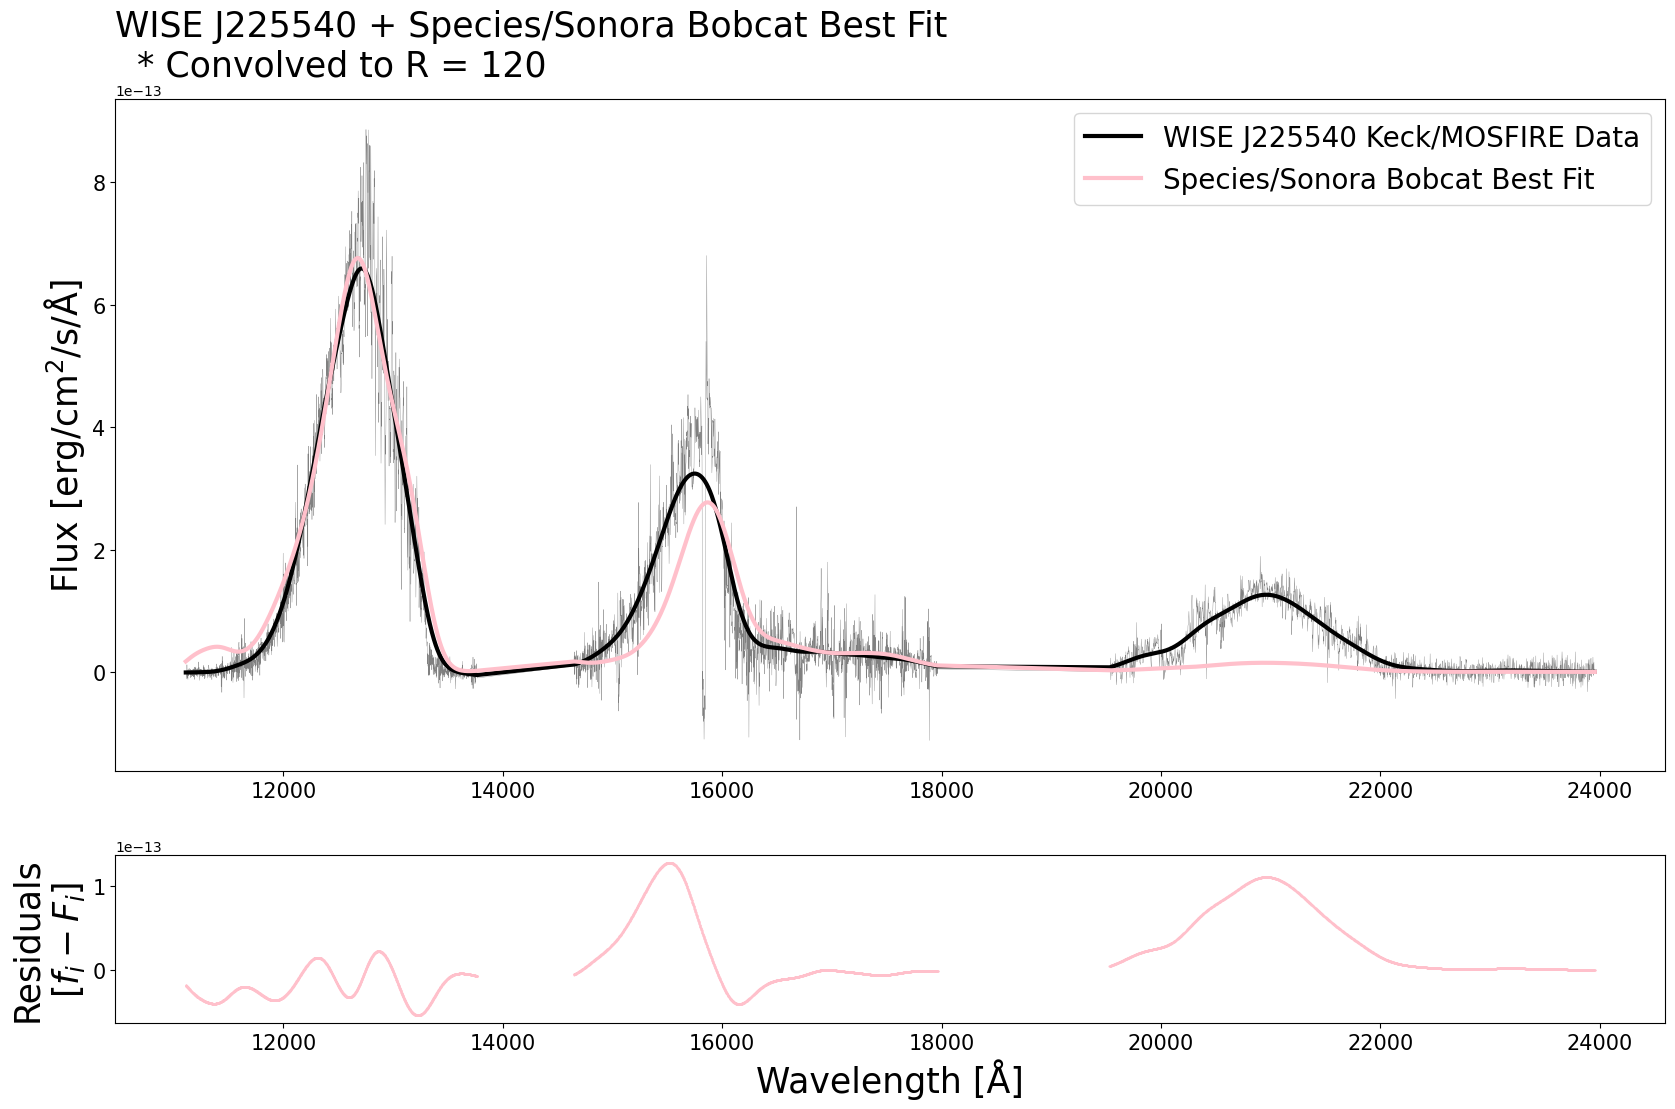

In [303]:
###################################
## Species/Sonora-bobcat Fitting ##
###################################

C_bobcat = np.zeros(len(bobcatsmooth_wave))
G_bobcat = np.zeros(len(bobcatsmooth_wave))
low_mod_bobcat = np.zeros((len(bobcatsmooth_wave), 2, (len(wave_um))))
for i in range(len(bobcatsmooth_wave)):
    interp_bobcat = np.interp(wave_um, bobcatsmooth_wave, bobcatsmooth_flux)
    range_bobcat = np.vstack([wave_um, interp_bobcat])
    low_mod_bobcat[i, :, :] = convolve_v2(range_bobcat, 120, 1)
    C_bobcat[i] = (np.nansum((low_mod_bobcat[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_bobcat[i, 1, :] ** 2 / u_smooth ** 2))
G_bobcat = np.nansum(((f_smooth - low_mod_bobcat[i, 1, :] * C_bobcat[i]) / u_smooth) ** 2)
G_bobcatmin = np.min(G_bobcat)
where_G_bobcatmin = np.where(G_bobcat == G_bobcatmin)
C_bobcatmin = C_bobcat[where_G_bobcatmin]
modindex_bobcat = int(where_G_bobcatmin[0])
residuals_bobcat = f_smooth - low_mod_bobcat[int(where_G_bobcatmin[0]), 1, :] * C_bobcatmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_bobcat[modindex_bobcat, 0, :] * 1e4, low_mod_bobcat[modindex_bobcat, 1, :] * C_bobcatmin, color = 'pink', linewidth = 3, label = 'Species/Sonora Bobcat Best Fit')
ax1.set_title(f'{target_short} + Species/Sonora Bobcat Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_bobcatmin}\n  * Minimum G value: {G_bobcatmin}\n  * T$_e$$_f$$_f$: 544 K\n  * logg: 4.8\n  * Fe/H: -0.5', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_bobcat, color = 'pink', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies Sonora Bobcat Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/3720431899.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_chollamin = np.where(G_cholla == G_chollamin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/3720431899.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_cholla = int(where_G_chollamin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/3720431899.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing

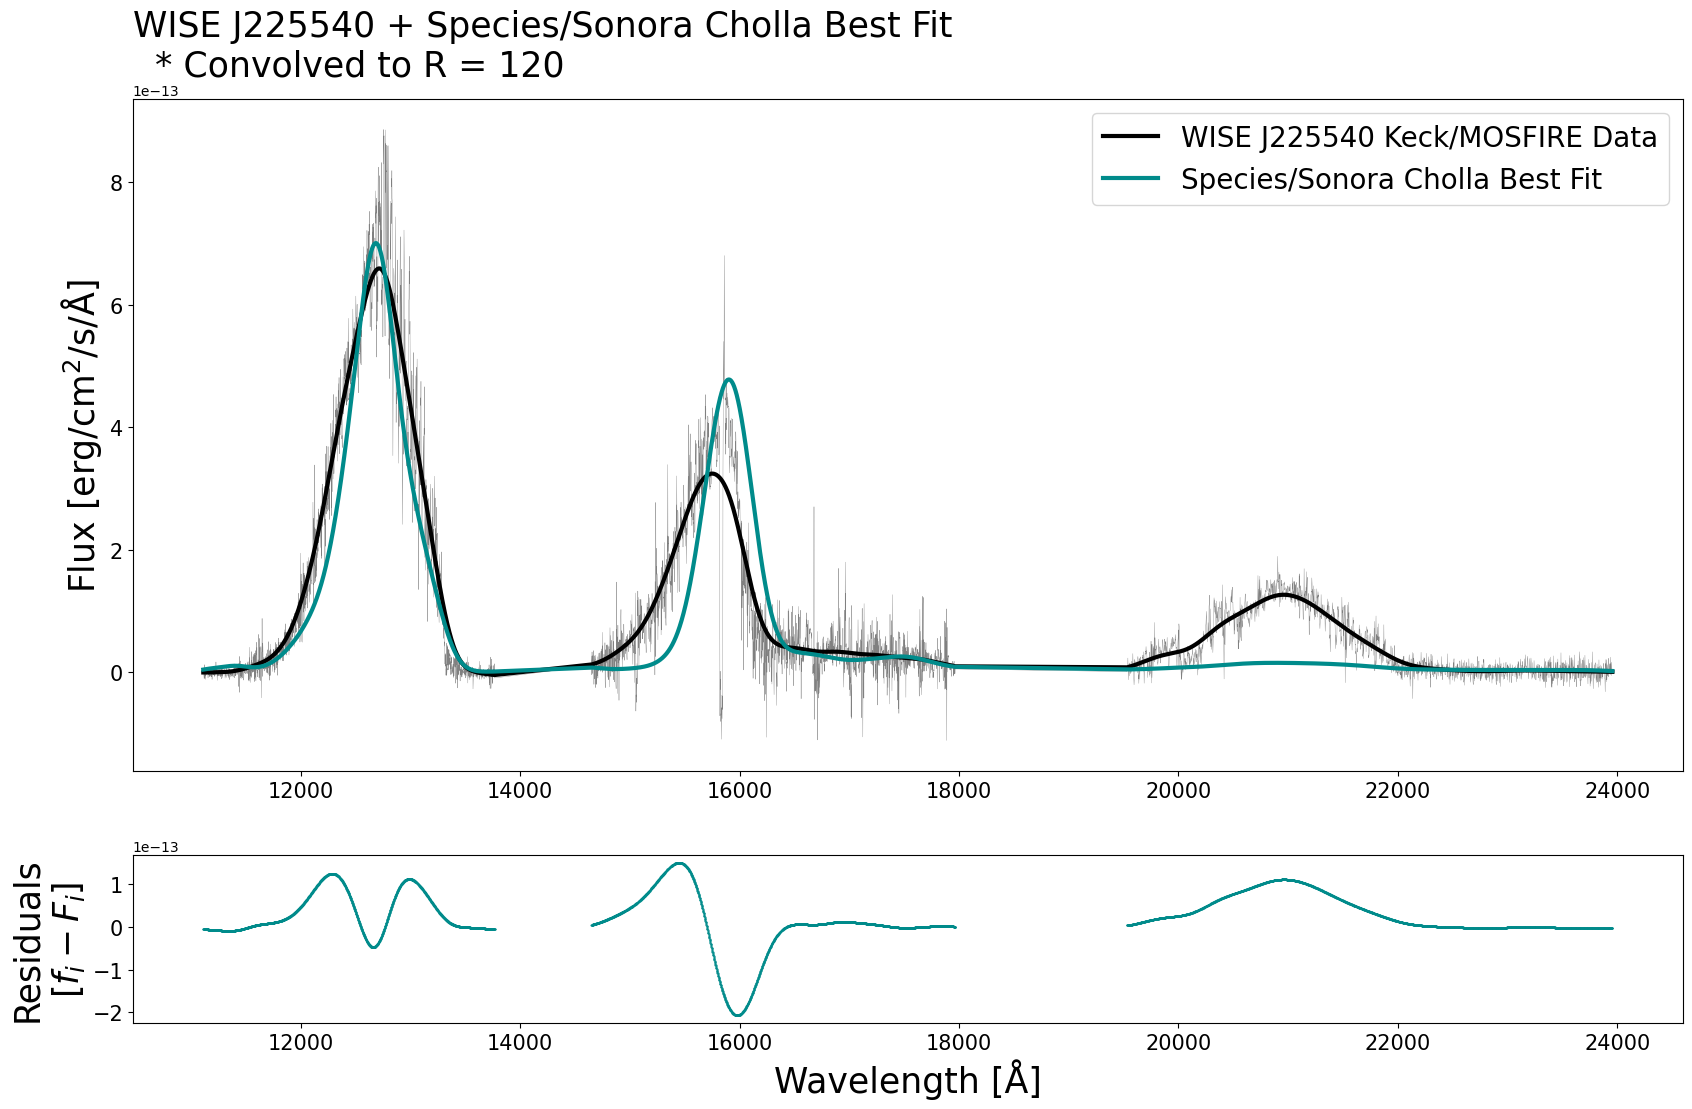

In [305]:
###################################
## Species/Sonora-cholla Fitting ##
###################################

C_cholla = np.zeros(len(chollasmooth_wave))
G_cholla = np.zeros(len(chollasmooth_wave))
low_mod_cholla = np.zeros((len(chollasmooth_wave), 2, (len(wave_um))))
for i in range(len(chollasmooth_wave)):
    interp_cholla = np.interp(wave_um, chollasmooth_wave, chollasmooth_flux)
    range_cholla = np.vstack([wave_um, interp_cholla])
    low_mod_cholla[i, :, :] = convolve_v2(range_cholla, 120, 1)
    C_cholla[i] = (np.nansum((low_mod_cholla[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_cholla[i, 1, :] ** 2 / u_smooth ** 2))
G_cholla = np.nansum(((f_smooth - low_mod_cholla[i, 1, :] * C_cholla[i]) / u_smooth) ** 2)
G_chollamin = np.min(G_cholla)
where_G_chollamin = np.where(G_cholla == G_chollamin)
C_chollamin = C_cholla[where_G_chollamin]
modindex_cholla = int(where_G_chollamin[0])
residuals_cholla = f_smooth - low_mod_cholla[int(where_G_chollamin[0]), 1, :] * C_chollamin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_cholla[modindex_cholla, 0, :] * 1e4, low_mod_cholla[modindex_cholla, 1, :] * C_chollamin, color = 'darkcyan', linewidth = 3, label = 'Species/Sonora Cholla Best Fit')
ax1.set_title(f'{target_short} + Species/Sonora Cholla Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_chollamin}\n  * Minimum G value: {G_chollamin}\n  * T$_e$$_f$$_f$: 501 K\n  * logg: 5.5\n  * logK$_z$$_z$: 7.0', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_cholla, color = 'darkcyan', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSpecies Sonora Cholla Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/777363935.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_t75 = int(where_Gt75min[0])


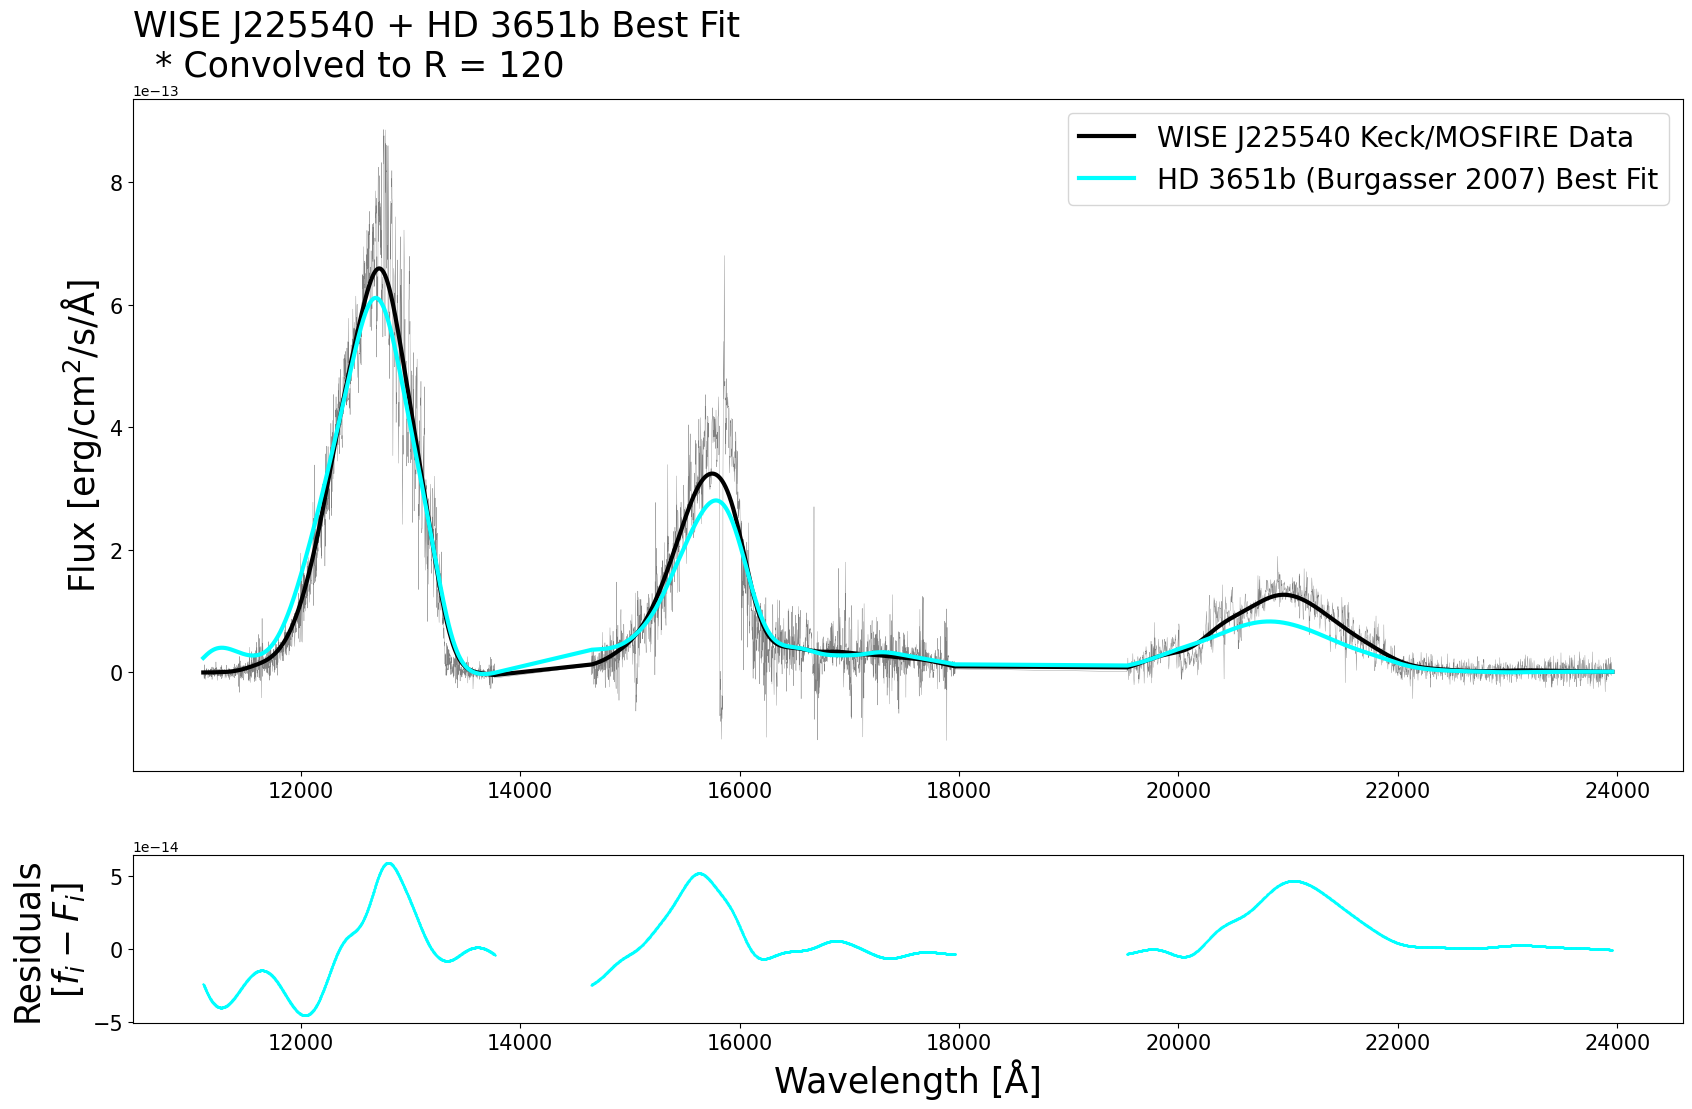

In [307]:
##################################
## HD 3651b (SpeX T7.5) Fitting ##
##################################

C_t75 = np.zeros(len(spex_T75))
G_t75 = np.zeros(len(spex_T75))
low_mod_t75 = np.zeros((len(spex_T75), 2, (len(wave))))
for i in range(len(spex_T75)):
    mod = np.loadtxt(spex_T75[i])
    w = mod[:, 0] * 1e4
    f = mod[:, 1]
    interp_t75 = np.interp(wave, w, f)
    range_t75 = np.vstack([wave, interp_t75])
    low_mod_t75[i, :, :] = convolve_v2(range_t75, 120, 1)
    C_t75[i] = (np.nansum((low_mod_t75[i, 1, :] * flux) / unc ** 2)) / (np.nansum(low_mod_t75[i, 1, :] ** 2 / unc ** 2))
    G_t75[i] = np.nansum(((flux - low_mod_t75[i, 1, :] * C_t75[i]) / unc) ** 2)
Gt75_min = np.min(G_t75)
where_Gt75min = np.where(G_t75 == Gt75_min)
Ct75_min = C_t75[where_Gt75min]
modindex_t75 = int(where_Gt75min[0])
bestfit_t75 = np.loadtxt(spex_T75[modindex_t75])
bestmodel_t75 = spex_T75[modindex_t75]
residuals_t75 = f_smooth - low_mod_t75[modindex_t75, 1, :] * Ct75_min

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_t75[modindex_t75, 0, :], low_mod_t75[modindex_t75, 1, :] * Ct75_min, color = 'aqua', linewidth = 3, label = 'HD 3651b (Burgasser 2007) Best Fit')
ax1.set_title(f'{target_short} + HD 3651b Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
#ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_chollamin}\n  * Minimum G value: {G_chollamin}\n  * T$_e$$_f$$_f$: 501 K\n  * logg: 5.5\n  * logK$_z$$_z$: 7.0', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth * 1e4, residuals_t75, color = 'aqua', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSHD 3651b (SpeX T75) Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/794138680.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_rossmin = np.where(G_ross == G_rossmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_47677/794138680.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_ross = int(where_G_rossmin[0])


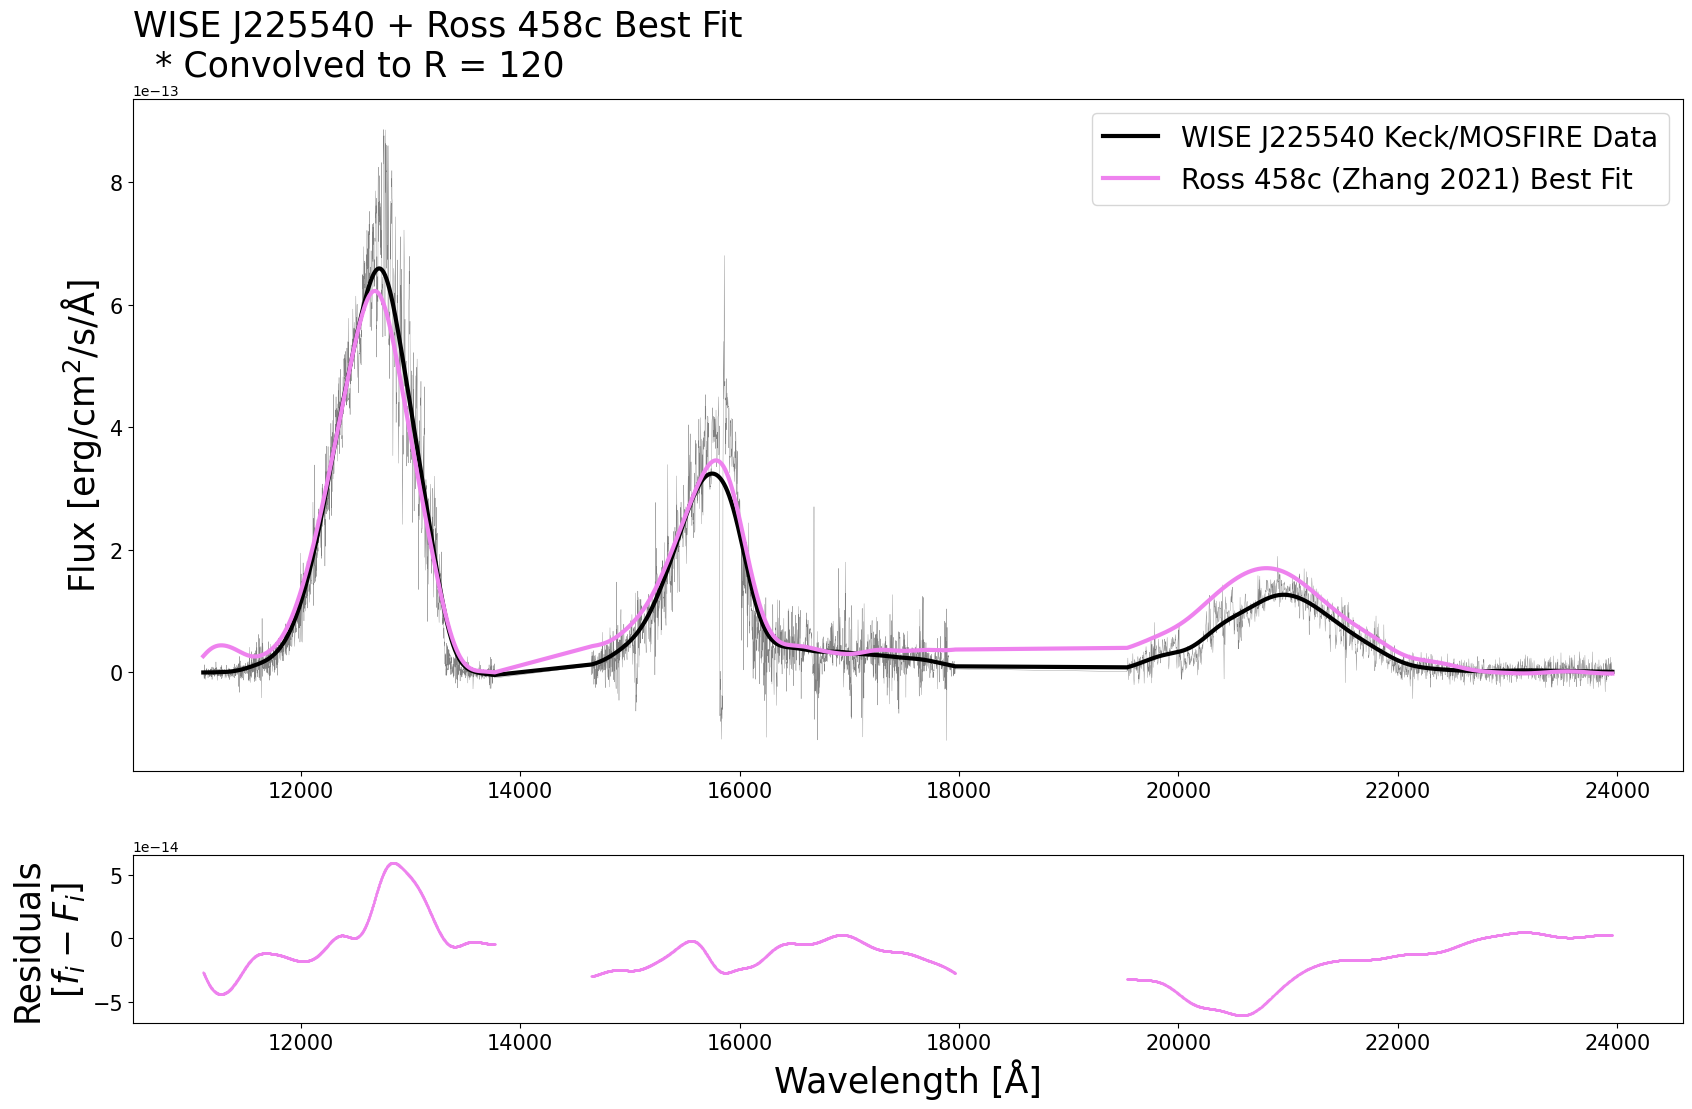

In [309]:
#######################
## Ross 458c Fitting ##
#######################

C_ross = np.zeros(len(ross_wave))
G_ross = np.zeros(len(ross_wave))
low_mod_ross = np.zeros((len(ross_wave), 2, (len(wave_um))))
for i in range(len(ross_wave)):
    interp_ross = np.interp(wave_um, ross_wave, ross_flux)
    range_ross = np.vstack([wave_um, interp_ross])
    low_mod_ross[i, :, :] = convolve_v2(range_ross, 120, 1)
    C_ross[i] = (np.nansum((low_mod_ross[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_ross[i, 1, :] ** 2 / u_smooth ** 2))
G_ross = np.nansum(((f_smooth - low_mod_ross[i, 1, :] * C_ross[i]) / u_smooth) ** 2)
G_rossmin = np.min(G_ross)
where_G_rossmin = np.where(G_ross == G_rossmin)
C_rossmin = C_ross[where_G_rossmin]
modindex_ross = int(where_G_rossmin[0])
residuals_ross = f_smooth - low_mod_ross[modindex_ross, 1, :] * C_rossmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_ross[modindex_ross, 0, :] * 1e4, low_mod_ross[modindex_ross, 1, :] * C_rossmin, color = 'violet', linewidth = 3, label = 'Ross 458c (Zhang 2021) Best Fit')
ax1.set_title(f'{target_short} + Ross 458c Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)

ax2.scatter(w_smooth * 1e4, residuals_ross, color = 'violet', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSRoss 458c Best Fit')

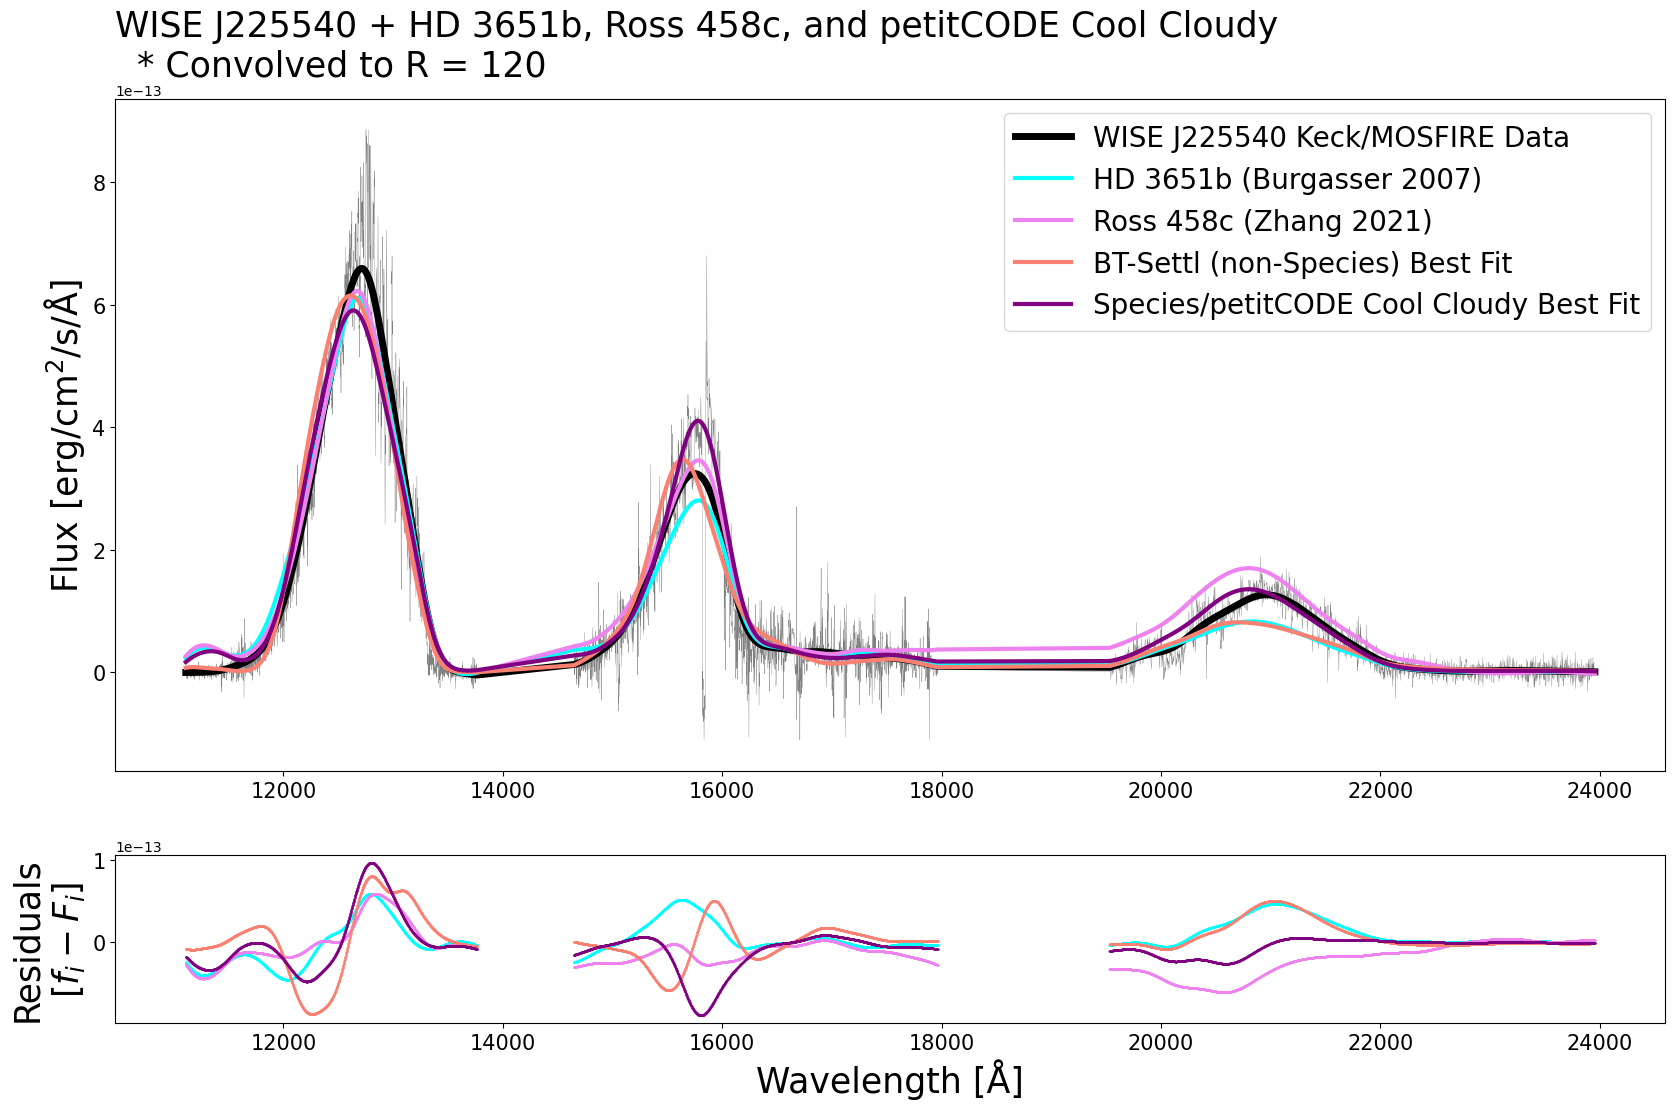

In [311]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um * 1e4, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth * 1e4, f_smooth, color = 'black', linewidth = 5, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_t75[modindex_t75, 0, :], low_mod_t75[modindex_t75, 1, :] * Ct75_min, color = 'aqua', linewidth = 3, label = 'HD 3651b (Burgasser 2007)')
ax1.plot(low_mod_ross[modindex_ross, 0, :] * 1e4, low_mod_ross[modindex_ross, 1, :] * C_rossmin, color = 'violet', linewidth = 3, label = 'Ross 458c (Zhang 2021)')
ax1.plot(low_mod_btsettl[modindex_btsettl, 0, :], low_mod_btsettl[modindex_btsettl, 1, :] * C_btsettlmin, color = 'salmon', linewidth = 3, label = 'BT-Settl (non-Species) Best Fit')
ax1.plot(low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 0, :] * 1e4, low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin, color = 'purple', linewidth = 3, label = 'Species/petitCODE Cool Cloudy Best Fit')
ax1.set_title(f'{target_short} + HD 3651b, Ross 458c, and petitCODE Cool Cloudy\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'HD 3651b fitting parameters:\n  * Minimum C value: {Ct75_min}\n  * Minimum G value: {Gt75_min}\n\nRoss 458c fitting parameters:\n  * Minimum C value: {C_rossmin}\n  * Minimum G value: {G_rossmin}', (1.75, 3.2e-13), fontsize = 12)
ax1.annotate(f'BT-Settl (non-Species) fitting parameters:\n  * Minimum C value: {C_btsettlmin}\n  * Minimum G value: {G_btsettlmin}\n  * T$_e$$_f$$_f$: 600 K\n  * logg = 3.5\n\npetitCODE Cool Cloudy fitting parameters:\n  * Minimum C value: {C_petitcoolcloudymin}\n  * Minimum G value: {G_petitcoolcloudymin}\n  * T$_e$$_f$$_f$: 550 K\n  * logg: 4.3\n  * Fe/H: 0.0', (2.12, 1.65e-13), fontsize = 12)

ax2.scatter(w_smooth * 1e4, residuals_t75, color = 'aqua', marker = '.', s = 1)
ax2.scatter(w_smooth * 1e4, residuals_ross, color = 'violet', marker = '.', s = 1)
ax2.scatter(w_smooth * 1e4, residuals_btsettl, color = 'salmon', marker = '.', s = 1)
ax2.scatter(w_smooth * 1e4, residuals_petitcoolcloudy, color = 'purple', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [Å]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('SSSWISE J225540 - HD 3651b - Ross 458c - BT-Settl (non-Species) - petitCODE Cool Clear')

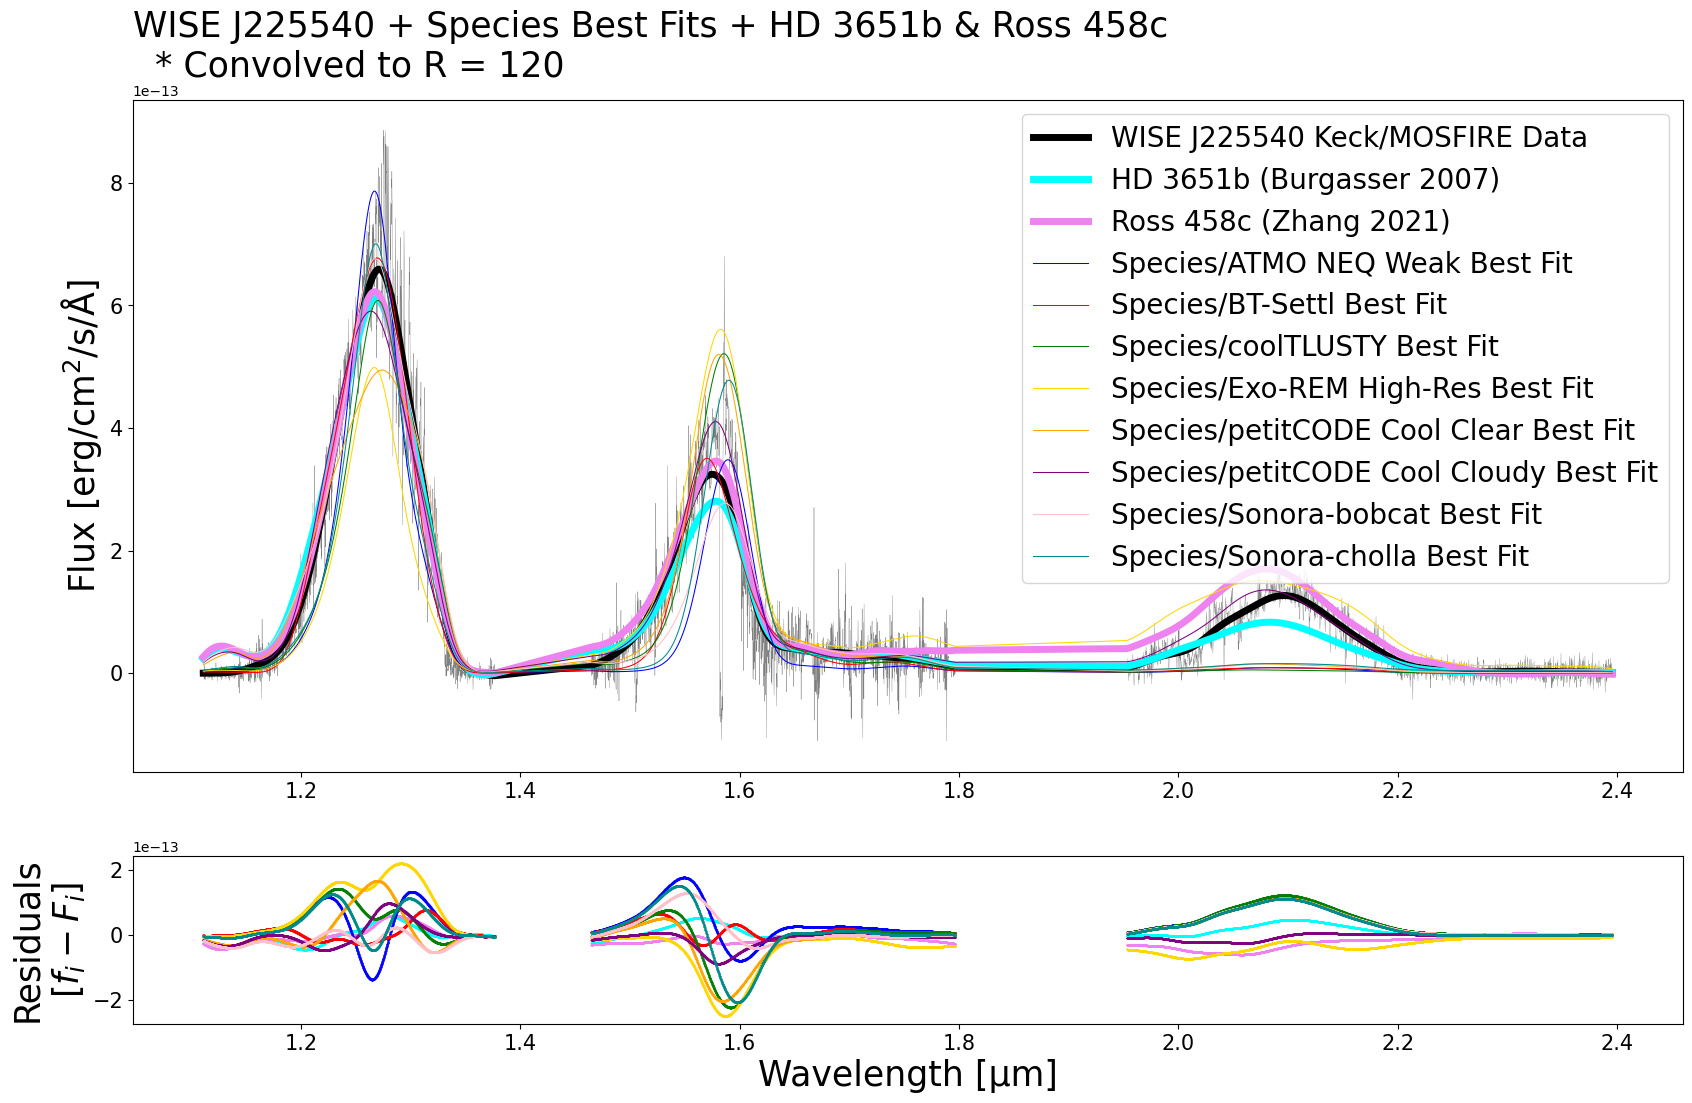

In [126]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 5, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_t75[modindex_t75, 0, :] * 1e-4, low_mod_t75[modindex_t75, 1, :] * Ct75_min, color = 'aqua', linewidth = 5, label = 'HD 3651b (Burgasser 2007)')
ax1.plot(low_mod_ross[modindex_ross, 0, :], low_mod_ross[modindex_ross, 1, :] * C_rossmin, color = 'violet', linewidth = 5, label = 'Ross 458c (Zhang 2021)')
ax1.plot(low_mod_atmoNW[modindex_atmoNW, 0, :], low_mod_atmoNW[modindex_atmoNW, 1, :] * C_atmoNWmin, color = 'blue', linewidth = 0.75, label = 'Species/ATMO NEQ Weak Best Fit')
ax1.plot(low_mod_bt[modindex_bt, 0, :], low_mod_bt[modindex_bt, 1, :] * C_btmin, color = 'red', linewidth = 0.75, label = 'Species/BT-Settl Best Fit')
ax1.plot(low_mod_coolTLUSTY[modindex_coolTLUSTY, 0, :], low_mod_coolTLUSTY[modindex_coolTLUSTY, 1, :] * C_coolTLUSTYmin, color = 'green', linewidth = 0.75, label = 'Species/coolTLUSTY Best Fit')
ax1.plot(low_mod_exoremhighres[modindex_exoremhighres, 0, :], low_mod_exoremhighres[modindex_exoremhighres, 1, :] * C_exoremhighresmin, color = 'gold', linewidth = 0.75, label = 'Species/Exo-REM High-Res Best Fit')
ax1.plot(low_mod_petitcoolclear[modindex_petitcoolclear, 0, :], low_mod_petitcoolclear[modindex_petitcoolclear, 1, :] * C_petitcoolclearmin, color = 'orange', linewidth = 0.75, label = 'Species/petitCODE Cool Clear Best Fit')
ax1.plot(low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 0, :], low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin, color = 'purple', linewidth = 0.75, label = 'Species/petitCODE Cool Cloudy Best Fit')
ax1.plot(low_mod_bobcat[modindex_bobcat, 0, :], low_mod_bobcat[modindex_bobcat, 1, :] * C_bobcatmin, color = 'pink', linewidth = 0.75, label = 'Species/Sonora-bobcat Best Fit')
ax1.plot(low_mod_cholla[modindex_cholla, 0, :], low_mod_cholla[modindex_cholla, 1, :] * C_chollamin, color = 'darkcyan', linewidth = 0.75, label = 'Species/Sonora-cholla Best Fit')
ax1.set_title(f'{target_short} + Species Best Fits + HD 3651b & Ross 458c\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)

ax2.scatter(w_smooth, residuals_t75, color = 'aqua', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_ross, color = 'violet', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_atmoNW, color = 'blue', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_bt, color = 'red', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_coolTLUSTY, color = 'green', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_exoremhighres, color = 'gold', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_petitcoolclear, color = 'orange', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_petitcoolcloudy, color = 'purple', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_bobcat, color = 'pink', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_cholla, color = 'darkcyan', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species Best Fits + HD 3651b and Ross 458c')

Minimum G values from smallest to largest:

* HD 3651b:               28947.17873750469
* Ross 458c:              474975.88262207893
* petitCODE Cool Cloudy:  590543.5758500815
* BT-Settl (non-Species): 724731.5359779863
* BT-Settl (Species):     1086383.9701455706
* Sonora Bobcat:          1439365.1954817455
* petitCODE Cool Clear:   2997709.965819239
* ATMO NEQ Weak:          3025353.049636212
* Sonora Cholla:          3084961.908407043
* coolTLUSTY:             3211936.802065515
* Exo-REM High-Res:       5460318.747557015


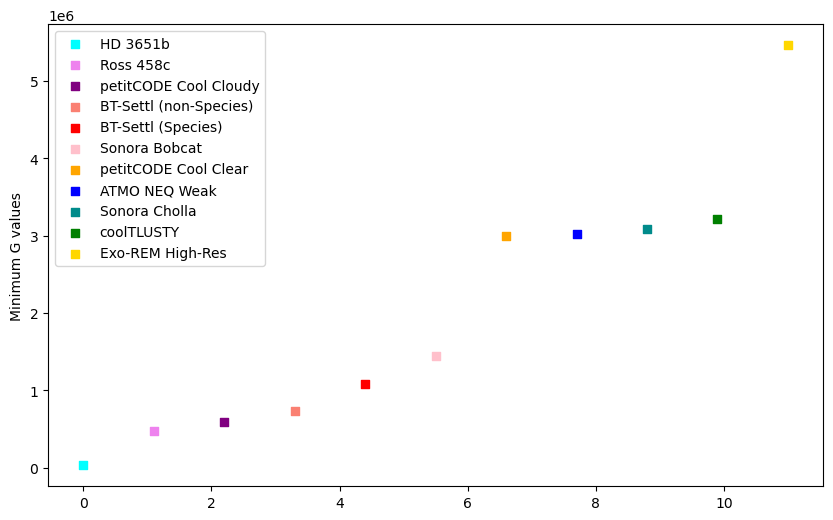

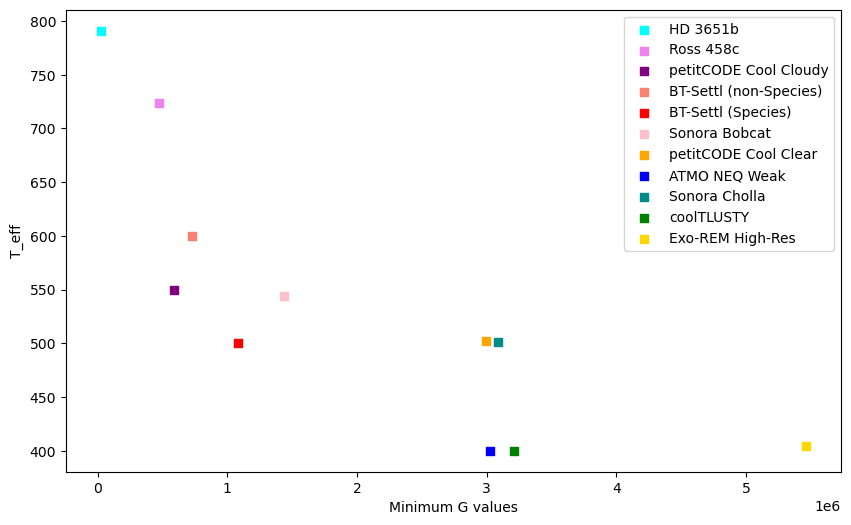

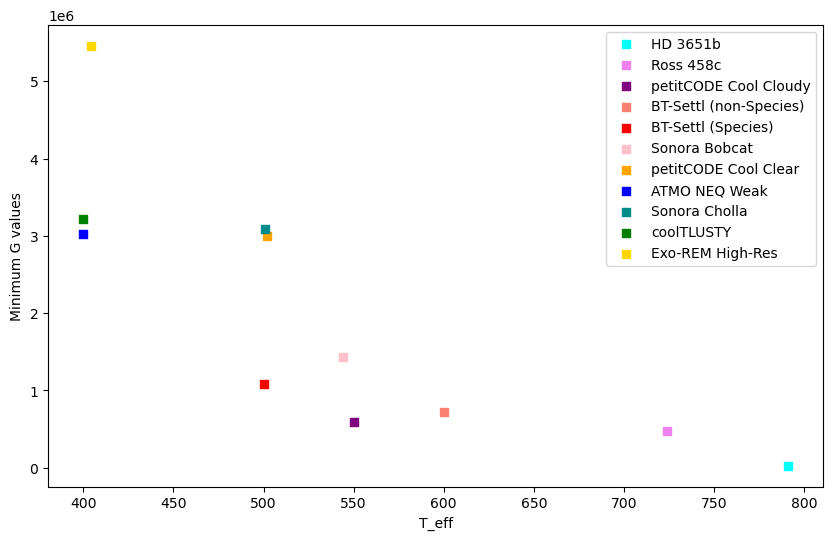

In [318]:
Gmin_vals = [['ATMO NEQ Weak', G_atmoNWmin], ['BT-Settl (Species)', G_btmin], ['BT-Settl (non-Species)', G_btsettlmin],
             ['coolTLUSTY', G_coolTLUSTYmin], ['Exo-REM High-Res', G_exoremhighresmin], ['petitCODE Cool Clear', G_petitcoolclearmin],
             ['petitCODE Cool Cloudy', G_petitcoolcloudymin], ['Sonora Bobcat', G_bobcatmin], ['Sonora Cholla', G_chollamin],
             ['HD 3651b', Gt75_min], ['Ross 458c', G_rossmin]]
Gmin_vals.sort(key = lambda x: x[1])

temps = [791, 724, 550, 600, 500, 544, 502, 400, 501, 400, 404]
colors = ['aqua', 'violet', 'purple', 'salmon', 'red', 'pink', 'orange', 'blue', 'darkcyan', 'green', 'gold']

print('Minimum G values from smallest to largest:')
print(f'\n* HD 3651b:               {Gmin_vals[0][1]}\n* Ross 458c:              {Gmin_vals[1][1]}\n* petitCODE Cool Cloudy:  {Gmin_vals[2][1]}\n* BT-Settl (non-Species): {Gmin_vals[3][1]}\n* BT-Settl (Species):     {Gmin_vals[4][1]}\n* Sonora Bobcat:          {Gmin_vals[5][1]}\n* petitCODE Cool Clear:   {Gmin_vals[6][1]}\n* ATMO NEQ Weak:          {Gmin_vals[7][1]}\n* Sonora Cholla:          {Gmin_vals[8][1]}\n* coolTLUSTY:             {Gmin_vals[9][1]}\n* Exo-REM High-Res:       {Gmin_vals[10][1]}')

x = np.linspace(0, len(Gmin_vals), len(Gmin_vals))
plt.figure(figsize = (10, 6))
for i in range(len(x)):
    plt.scatter(x[i], Gmin_vals[i][1], color = colors[i], marker = 's', label = Gmin_vals[i][0])
    plt.ylabel('Minimum G values')
    plt.legend(loc = 'best')

plt.figure(figsize = (10, 6))
for i in range(len(temps)):
    plt.scatter(Gmin_vals[i][1], temps[i], color = colors[i], marker = 's', label = Gmin_vals[i][0])
    plt.xlabel('Minimum G values')
    plt.ylabel('T_eff')
    plt.legend(loc = 'best')

plt.figure(figsize = (10, 6))
for i in range(len(temps)):
    plt.scatter(temps[i], Gmin_vals[i][1], color = colors[i], marker = 's', label = Gmin_vals[i][0])
    plt.xlabel('T_eff')
    plt.ylabel('Minimum G values')
    plt.legend(loc = 'best')